# Data Cleaning – Credit Card Churn Dataset
This notebook performs initial data cleaning on the raw credit card churn dataset.  
The goal is to prepare the dataset for EDA and modeling by:
- Removing duplicates
- Handling missing values
- Addressing outliers
- Managing high-cardinality categorical features
- Handle Imbalanced Target Variable (`AttritionFlag`)
- Handle High Dimensionality
 
The cleaned dataset will be saved in `data/processed/` for use in later stages.

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Reproducibility
np.random.seed(42)

In [2]:
# Paths
DATA_DIR = Path("../../data/raw")
FILE_PATH = DATA_DIR / "credit_card_attrition_dataset_mark.csv" 

## Loading the Dataset

In [3]:
# Load
df = pd.read_csv(FILE_PATH)

## 1. Looking at the Dataset

*I begin by examining the dataset, including number of rows, columns, data types, and summarize key statistics such as mean, median, min, max, and standard deviation for numeric columns. 
This helps to get an initial sense of the data and spot any obvious issues early on.*

In [4]:
df.shape

(101000, 63)

In [5]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CreditLimit',
       'TotalTransactions', 'TotalSpend', 'Tenure', 'MaritalStatus',
       'EducationLevel', 'CardType', 'Country', 'AttritionFlag', 'Feature_0',
       'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
       'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
       'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30',
       'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35',
       'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39', 'Feature_40',
       'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44', 'Feature_45',
       'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49'],
      dtype='object')

In [6]:
df.head()

,CustomerID,Age,Gender,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,MaritalStatus,EducationLevel,CardType,Country,AttritionFlag,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49
0,CUST047573,45,Female,112955.763499,18089.293599,102,7057.961760,3,Divorced,Master,Platinum,Country_36,0,-0.434767,0.119666,-0.318213,0.640795,0.274335,0.206611,0.771154,-0.307925,1.084278,0.006474,1.049323,0.273919,-0.435212,0.464209,0.818723,-0.618114,1.514308,-1.089611,1.774531,0.071060,-0.920471,1.853052,1.995785,-1.310904,-1.246411,0.614533,-1.254153,0.858942,-0.179080,-0.807150,2.178751,0.597848,-0.528956,1.184405,-0.309697,-0.737361,0.597346,-0.742293,0.726445,-1.100610,-1.792390,1.157889,1.735477,-0.240003,0.767626,0.242654,0.084097,1.035898,-1.450343,0.083688
1,CUST006615,44,Female,42980.787139,17317.747673,94,8101.572278,9,Divorced,PhD,Gold,Country_97,0,0.538034,-0.258189,-0.903829,-0.460888,1.443172,1.304155,0.937114,0.155703,0.743411,1.480021,0.375655,1.064608,-1.585891,0.562793,-1.929952,-1.191992,-0.143408,0.496699,-0.338638,0.160756,-0.335619,-0.279705,-0.179002,-0.147386,0.194051,-1.913783,-1.249456,0.241449,-0.614158,-1.274391,-0.901611,-0.182641,0.841776,-0.384364,0.252687,-1.083126,0.369728,-0.220375,-0.642129,-0.685525,-1.194323,-0.083037,1.142575,1.020381,0.981074,2.002470,-0.847103,0.084373,-0.964711,-0.759402
2,CUST032313,44,Male,114584.549890,17450.444657,87,17989.977994,16,Divorced,Bachelor,Silver,Country_34,0,-0.566592,0.014330,-0.052454,-0.890392,-0.809044,-1.342568,1.807094,0.899302,0.586818,0.213860,-0.907671,-1.131695,-1.374161,-0.232484,0.030891,0.606602,-0.117879,0.215530,0.846452,1.003204,0.363728,-0.131496,0.204634,0.955006,0.220422,-0.638782,-0.211857,-0.104988,0.049720,-0.919405,1.510323,1.299180,0.245053,0.197458,-0.420686,-2.086456,-0.390145,-2.003357,-0.092568,-1.118541,0.662366,-0.135308,0.606588,-0.207029,-0.913980,0.316399,0.065882,0.253181,-0.262693,-1.645613
3,CUST008756,40,Female,NaN,10444.914691,90,2534.813451,11,Married,Master,Gold,Country_54,0,1.278177,0.288838,-0.992037,-0.441426,-0.139551,1.008386,1.180335,-0.083533,-0.110255,-0.262637,-0.764924,-0.684805,0.111510,-0.173965,0.051776,-0.375176,0.444438,-0.829629,-0.215294,0.249391,-0.430016,-0.363777,0.650649,0.777868,-0.602814,-0.943926,-0.922181,-0.182337,-1.071135,-2.131752,-0.402764,1.364665,-0.159471,1.302598,-0.752025,-1.457173,-0.345743,0.594889,0.253113,-0.172385,0.936482,-0.404852,-0.818307,0.559377,-1.227673,-0.066525,1.502226,1.433764,-0.556853,0.227939
4,CUST043700,47,Male,74041.286720,8022.710937,106,6290.093235,4,Single,PhD,Platinum,Country_2,0,0.311488,0.109675,0.220423,-0.401206,-2.833971,-1.418391,-1.308369,-0.649136,-1.661351,0.540208,0.210440,-0.879341,0.811985,-0.752691,-1.098107,0.724498,-0.284943,0.522194,0.232143,0.100859,0.960675,-1.495624,0.199182,0.168626,-0.983714,-0.825614,-1.556191,0.793304,-0.353874,-0.434168,0.455644,0.542132,0.121676,-0.646512,1.118082,-0.504512,0.190027,0.080314,0.719031,-2.095253,0.338365,0.646012,-0.102709,0.109845,0.752232,0.810246,-2.212616,-1.198410,0.206907,0.359360


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 63 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         101000 non-null  object 
 1   Age                101000 non-null  int64  
 2   Gender             101000 non-null  object 
 3   Income             95945 non-null   float64
 4   CreditLimit        95958 non-null   float64
 5   TotalTransactions  101000 non-null  int64  
 6   TotalSpend         95949 non-null   float64
 7   Tenure             101000 non-null  int64  
 8   MaritalStatus      101000 non-null  object 
 9   EducationLevel     101000 non-null  object 
 10  CardType           101000 non-null  object 
 11  Country            101000 non-null  object 
 12  AttritionFlag      101000 non-null  int64  
 13  Feature_0          101000 non-null  float64
 14  Feature_1          101000 non-null  float64
 15  Feature_2          101000 non-null  float64
 16  Fe

In [8]:
df.describe()

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,AttritionFlag,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49
count,101000.000000,9.594500e+04,95958.000000,101000.000000,95949.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000,101000.000000
mean,44.509950,7.625490e+04,14980.997877,99.991386,5201.604187,10.000911,0.049653,0.004445,-0.001509,-0.000433,-0.003364,0.001091,0.003347,-0.000486,-0.001209,-0.000055,0.001868,0.000451,-0.000793,0.003673,0.002061,0.001600,-0.004433,0.006977,0.001224,0.001864,-0.003364,-0.001390,0.000391,-0.001782,0.003754,-0.001593,-0.000698,-0.004076,0.001845,0.001113,0.001956,0.004017,0.002574,0.003429,-0.001529,-0.001956,0.001086,-0.000883,-0.005357,-0.005749,0.005036,0.003072,-0.003430,-0.005083,0.002089,-0.000044,0.005287,-0.000013,0.002317,-0.004427,-0.000285
std,10.012043,6.825821e+04,5007.463431,9.991337,2976.315536,5.465092,0.217229,1.001087,0.999155,0.999672,1.000221,1.000308,0.997863,0.997961,1.001292,0.998548,1.002099,0.999451,1.000412,0.996937,0.999164,1.000958,0.997082,0.998138,0.999985,0.997962,0.997884,0.998456,1.002722,1.000446,1.001370,1.001474,1.004238,1.001315,0.998026,0.995752,1.001293,1.000746,1.001084,1.002706,1.000886,1.002720,1.000312,1.000654,0.999845,1.001273,0.997777,0.999517,1.002376,1.000198,0.999677,1.001804,0.999114,0.998145,1.001604,1.004311,0.998173
min,0.000000,-1.827772e+04,-7021.069804,61.000000,-4005.132671,1.000000,0.000000,-4.357991,-4.231399,-4.153703,-4.427714,-4.727021,-4.164801,-4.143513,-4.697303,-4.687258,-4.643908,-4.527162,-4.342673,-4.809884,-4.860939,-4.376318,-4.301017,-4.496043,-4.378182,-4.214090,-4.342635,-4.225562,-4.463381,-3.943763,-4.418059,-4.214805,-4.127572,-4.544189,-4.268144,-4.293951,-4.324396,-4.249953,-4.466161,-4.061376,-4.806442,-4.065600,-4.203655,-3.959446,-4.423069,-4.585496,-4.393201,-4.113981,-4.849129,-4.486861,-4.342730,-4.395101,-4.312835,-4.304543,-4.361010,-4.287676,-4.279205
25%,38.000000,5.665176e+04,11613.898089,93.000000,3663.273783,5.000000,0.000000,-0.672617,-0.674875,-0.670246,-0.681486,-0.673785,-0.668619,-0.675938,-0.677606,-0.672425,-0.669203,-0.671448,-0.674292,-0.666714,-0.674289,-0.670739,-0.674491,-0.663523,-0.672147,-0.670623,-0.676225,-0.671293,-0.678259,-0.678879,-0.668729,-0.678912,-0.679370,-0.680173,-0.672904,-0.673706,-0.672666,-0.668438,-0.669711,-0.673500,-0.676807,-0.677714,-0.671245,-0.675645,-0.676689,-0.678116,-0.670749,-0.670877,-0.673067,-0.679959,-0.670084,-0.674954,-0.668517,-0.675626,-0.676420,-0.683136,-0.673436
50%,45.000000,7.027228e+04,14963.494610,100.000000,5029.493748,10.000000,0.000000,0.003476,-0.005582,0.000868,-0.002586,0.002828,0.000973,-0.002350,-0.000201,0.002073,0.003377,-0.000034,-0.000657,0.004551,0.002490,0.002533,-0.008984,0.009884,0.003641,0.000224,-0.004021,-0.002140,0.001698,-0.000664,0.003619,-0.004674,-0.000726,-0.001905,0

*Remove unnecessary columns like `CustomerID`*

In [9]:
# Drop CustomerID
df.drop(columns=["CustomerID"], inplace=True)

print("CustomerID column removed. New shape:", df.shape)

CustomerID column removed. New shape: (101000, 62)


## 2. Checking for Duplicates

*Duplicate records can skew the analysis and lead to biased models.  
I check for exact duplicates in the dataset using `.duplicated()` method and remove them using `drop_duplicates()`.*

In [10]:
# Count duplicates
df.duplicated().sum()

np.int64(1000)

In [11]:
# Remove duplicates
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Get unique count for each variable
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df.nunique()

Age                      84
Gender                    2
Income                95000
CreditLimit           95000
TotalTransactions        85
TotalSpend            95000
Tenure                   19
MaritalStatus             4
EducationLevel            4
CardType                  4
Country                 100
AttritionFlag             2
Feature_0            100000
Feature_1            100000
Feature_2            100000
Feature_3            100000
Feature_4            100000
Feature_5            100000
Feature_6            100000
Feature_7            100000
Feature_8            100000
Feature_9            100000
Feature_10           100000
Feature_11           100000
Feature_12           100000
Feature_13           100000
Feature_14           100000
Feature_15           100000
Feature_16           100000
Feature_17           100000
Feature_18           100000
Feature_19           100000
Feature_20           100000
Feature_21           100000
Feature_22           100000
Feature_23          

In [14]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [15]:
df.shape

(100000, 62)

## 3. Checking for Missing Data

Missing values can bias the model if not handled properly.  
I check the distribution of missing values per column and decide on appropriate strategies. 

In [16]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(df.isna().sum())

Age                     0
Gender                  0
Income               5000
CreditLimit          5000
TotalTransactions       0
TotalSpend           5000
Tenure                  0
MaritalStatus           0
EducationLevel          0
CardType                0
Country                 0
AttritionFlag           0
Feature_0               0
Feature_1               0
Feature_2               0
Feature_3               0
Feature_4               0
Feature_5               0
Feature_6               0
Feature_7               0
Feature_8               0
Feature_9               0
Feature_10              0
Feature_11              0
Feature_12              0
Feature_13              0
Feature_14              0
Feature_15              0
Feature_16              0
Feature_17              0
Feature_18              0
Feature_19              0
Feature_20              0
Feature_21              0
Feature_22              0
Feature_23              0
Feature_24              0
Feature_25              0
Feature_26  

In [17]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

In [18]:
df[["Income", "CreditLimit", "TotalSpend"]].isnull().sum()

Income         5000
CreditLimit    5000
TotalSpend     5000
dtype: int64

*The columns that has missing values are `Income`, `CreditLimit`, `TotalSpend` which has 5k missing  values.*

In [19]:
cols_with_missing = ["Income", "CreditLimit", "TotalSpend"]

df[cols_with_missing].skew()

Income         9.753007
CreditLimit   -0.005467
TotalSpend     4.956590
dtype: float64

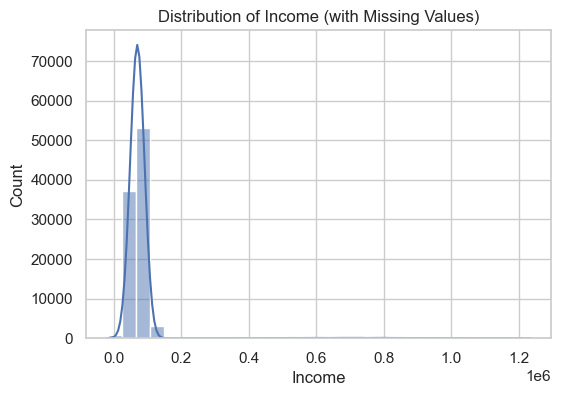

Saved: ..\..\reports\figures\data_cleaning\Income_distribution.png


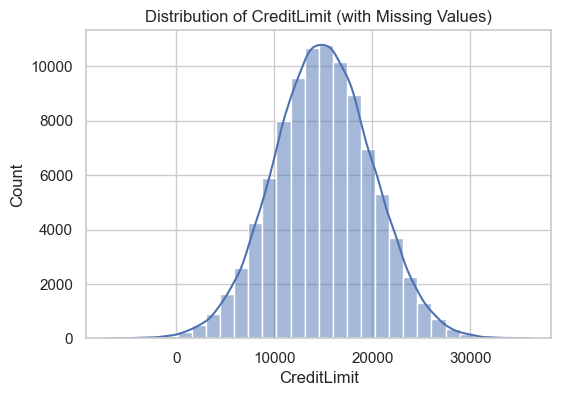

Saved: ..\..\reports\figures\data_cleaning\CreditLimit_distribution.png


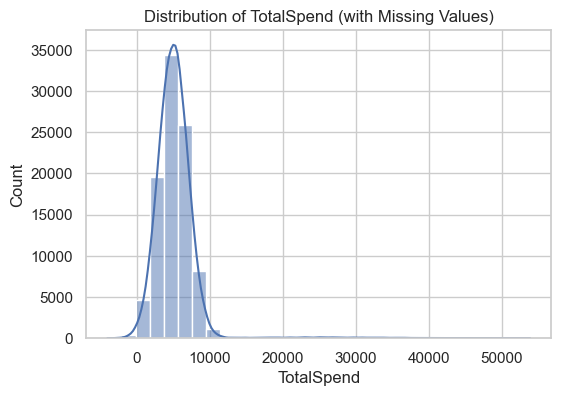

Saved: ..\..\reports\figures\data_cleaning\TotalSpend_distribution.png


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

figures_dir = Path("../../reports/figures/data_cleaning")
figures_dir.mkdir(parents=True, exist_ok=True)

cols_with_missing = ["Income", "CreditLimit", "TotalSpend"]

for col in cols_with_missing:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} (with Missing Values)")
    
    # Save figure
    save_path = figures_dir / f"{col}_distribution.png"
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    
    # Show plot
    plt.show()

    print(f"Saved: {save_path}")

*Since `Income` and `TotalSpend` were highly right-skewed, I will use median imputation to avoid distortion from outliers. `CreditLimit` was nearly symmetric, so I will use mean imputation to preserve its distribution.*

In [21]:
# Median for skewed features
df["Income"] = df["Income"].fillna(df["Income"].median())
df["TotalSpend"] = df["TotalSpend"].fillna(df["TotalSpend"].median())

# Mean for symmetric feature
df["CreditLimit"] = df["CreditLimit"].fillna(df["CreditLimit"].mean())

In [22]:
df[["Income", "CreditLimit", "TotalSpend"]].isnull().sum()

Income         0
CreditLimit    0
TotalSpend     0
dtype: int64

In [23]:
df.describe()

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,AttritionFlag,Feature_0,Feature_1,Feature_2,...,Feature_40,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.508690,7.590712e+04,14981.859704,99.992140,5191.245954,9.999980,0.049600,0.004126,-0.000928,-0.000206,...,0.003642,-0.002959,-0.004823,0.001613,0.000034,0.004805,-0.000070,0.002058,-0.004414,-0.000516
std,10.012717,6.632278e+04,4879.319420,9.997949,2897.125512,5.464637,0.217118,1.001098,0.999190,0.999999,...,0.999668,1.001941,1.000437,1.000040,1.001894,0.999132,0.998031,1.001715,1.003980,0.998066
min,0.000000,-1.827772e+04,-7021.069804,61.000000,-4005.132671,1.000000,0.000000,-4.357991,-4.231399,-4.153703,...,-4.113981,-4.849129,-4.486861,-4.342730,-4.395101,-4.312835,-4.304543,-4.361010,-4.287676,-4.279205
25%,38.000000,5.746005e+04,11815.257665,93.000000,3743.367280,5.000000,0.000000,-0.672855,-0.674246,-0.670267,...,-0.669973,-0.673030,-0.679973,-0.670967,-0.675078,-0.669367,-0.676075,-0.677120,-0.682738,-0.673527
50%,45.000000,7.026261e+04,14981.859704,100.000000,5029.232703,10.000000,0.000000,0.003265,-0.005114,0.001596,...,0.001217,-0.005589,-0.006657,0.000640,-0.000693,0.007728,-0.000571,0.003497,-0.003215,-0.001073
75%,51.000000,8.312253e+04,18139.629064,107.000000,6313.298848,15.000000,0.000000,0.674985,0.677243,0.674857,...,0.674990,0.668663,0.672068,0.677454,0.679025,0.677158,0.671080,0.676723,0.675218,0.670989
max,89.000000,1.233744e+06,36096.831719,146.000000,53896.734185,19.000000,1.000000,4.441448,4.381350,4.253646,...,4.338037,4.113717,4.101093,4.357028,4.522098,4.394473,4.278007,4.270151,4.301758,4.890074


## 4. Checking for Outliers

Outliers can distort model performance.  
I will use boxplots and IQR method to detect outliers.

In [24]:
# Get all numeric columns except target
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
if "AttritionFlag" in numeric_cols:
    numeric_cols.remove("AttritionFlag")

print("Numeric columns:", numeric_cols)

Numeric columns: ['Age', 'Income', 'CreditLimit', 'TotalTransactions', 'TotalSpend', 'Tenure', 'Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44', 'Feature_45', 'Feature_46', 'Feature_47', 'Feature_48', 'Feature_49']


In [25]:
# Function for detecting outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

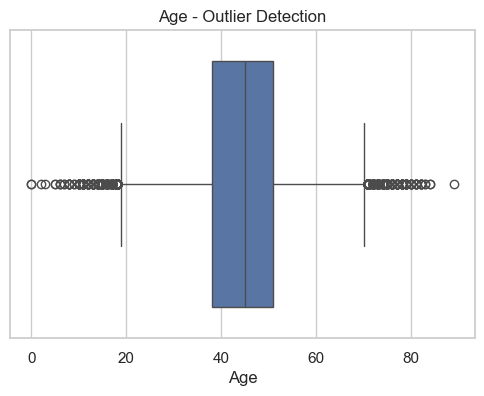

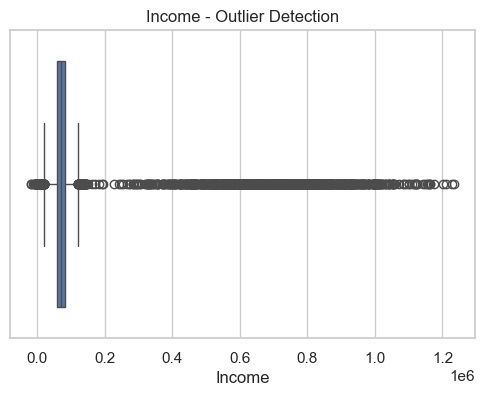

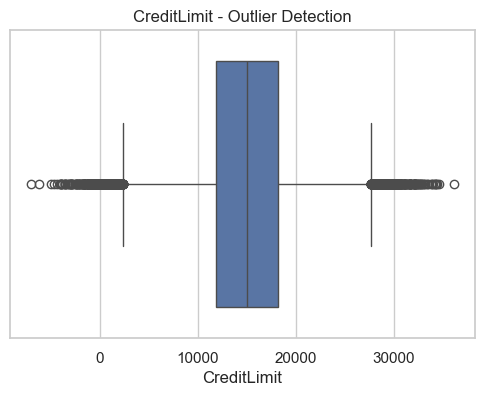

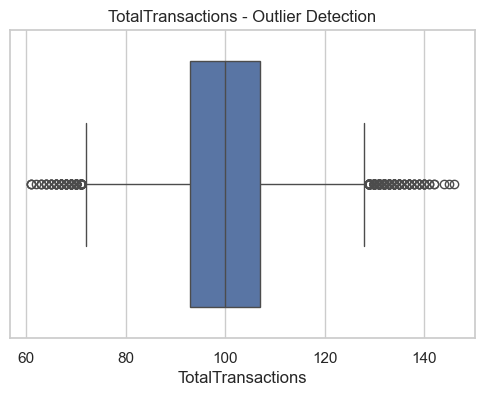

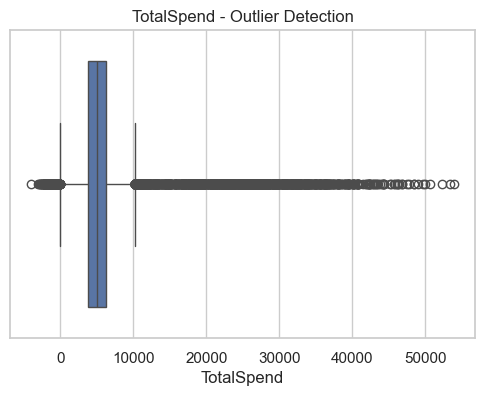

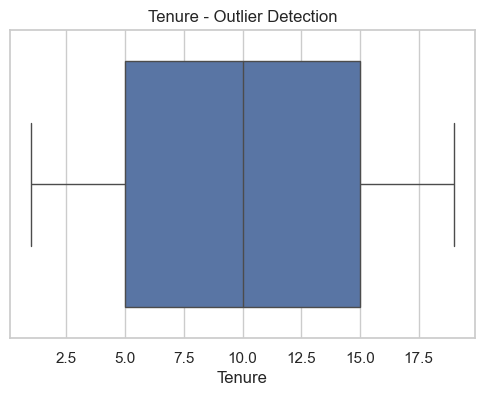

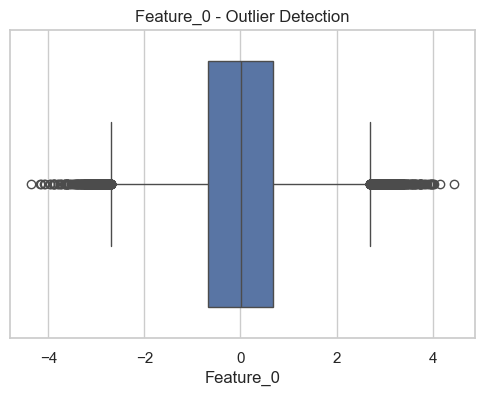

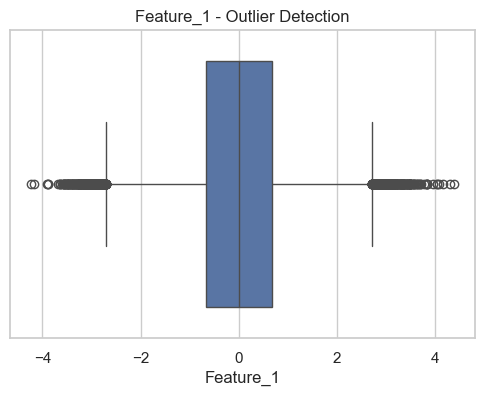

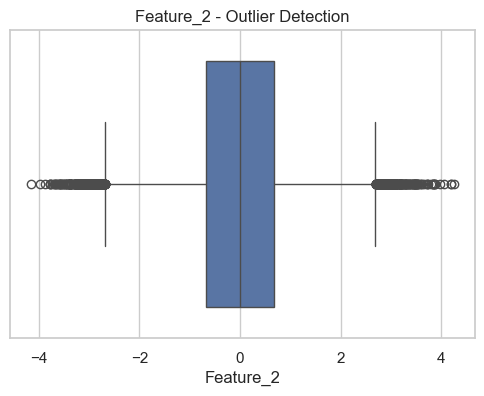

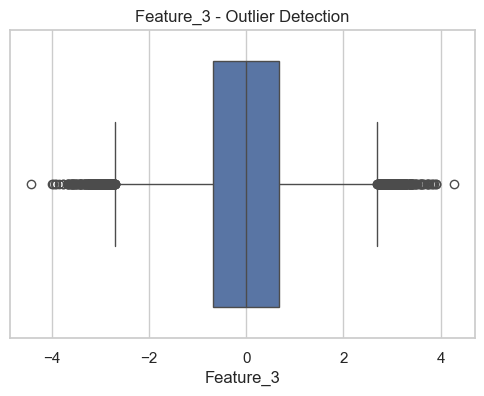

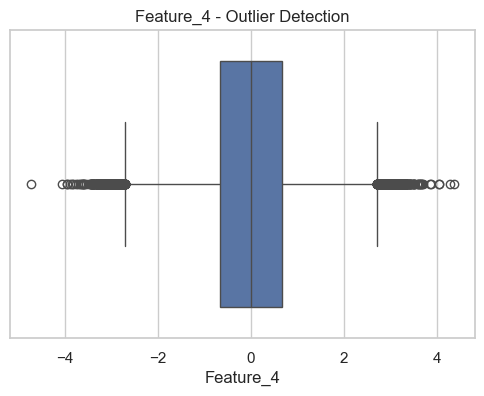

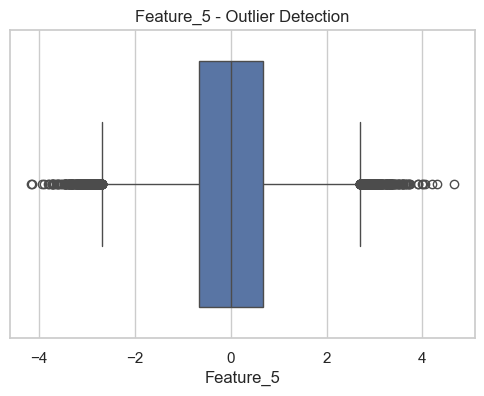

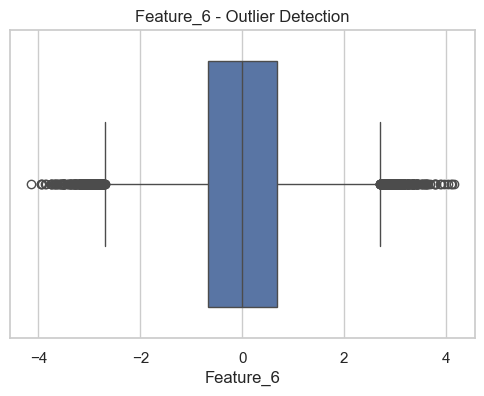

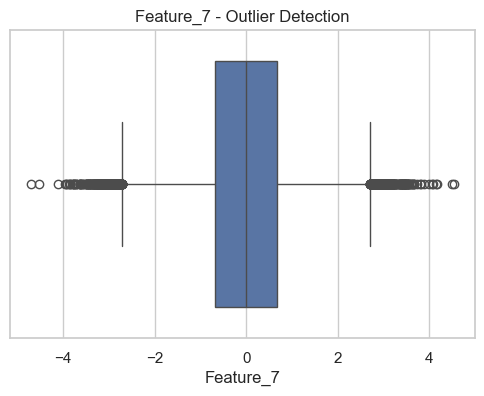

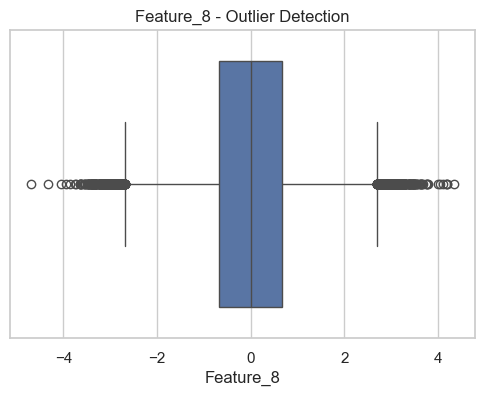

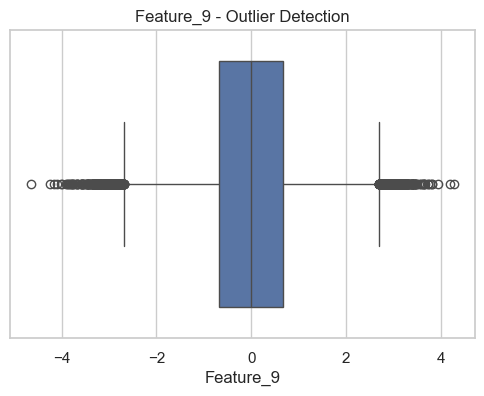

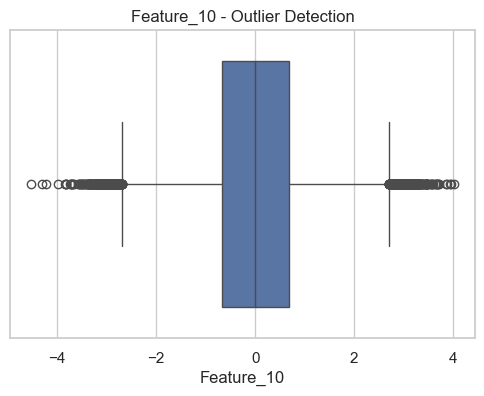

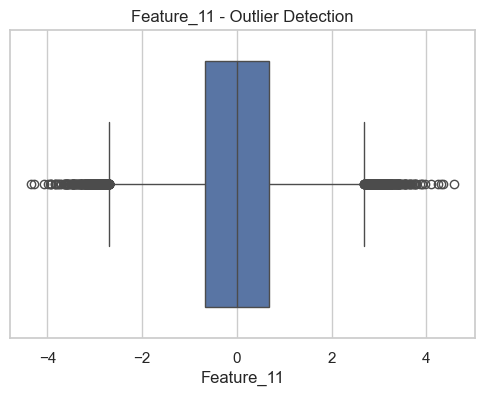

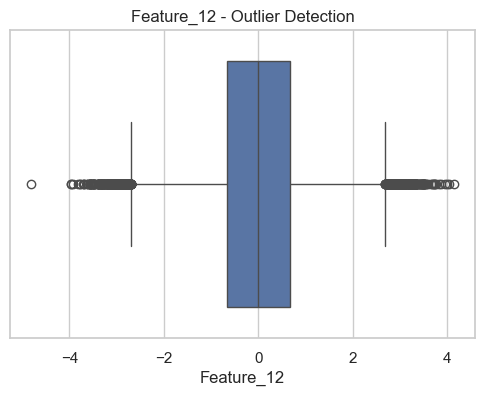

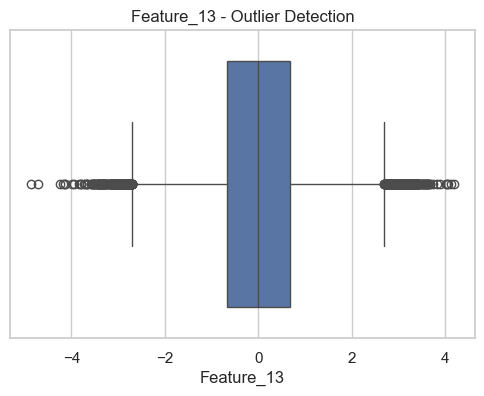

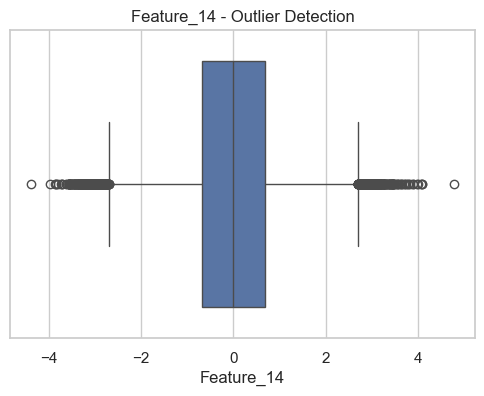

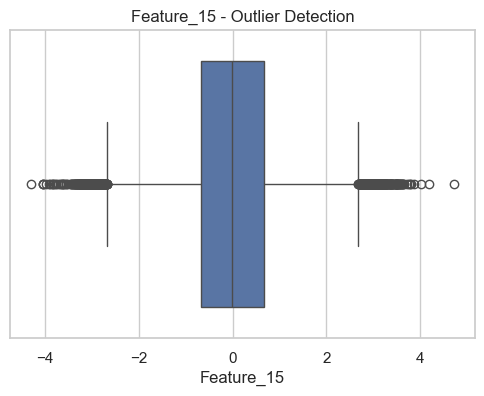

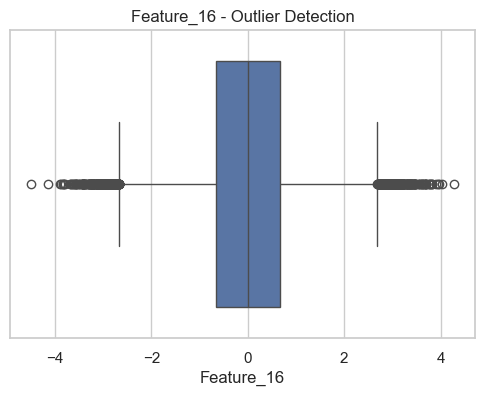

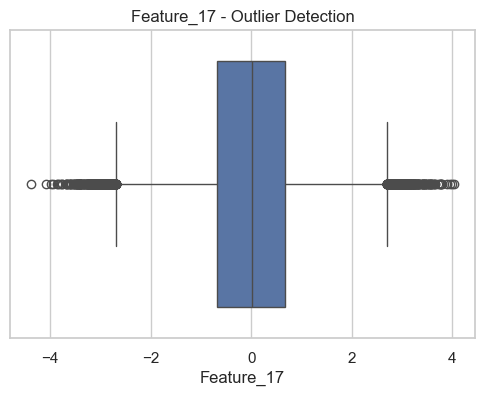

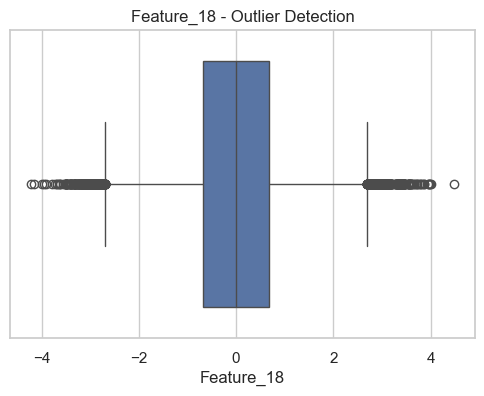

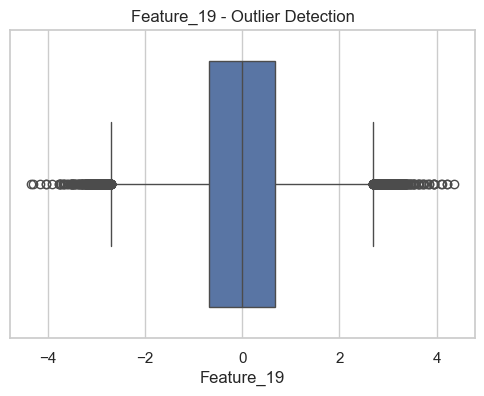

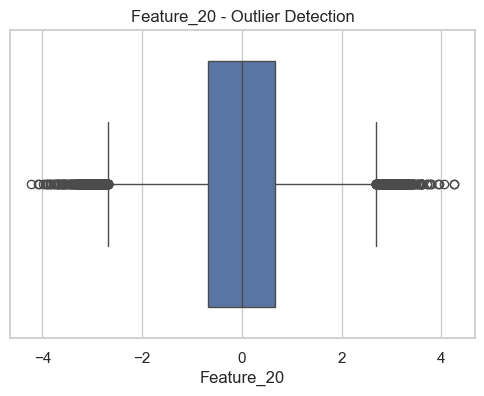

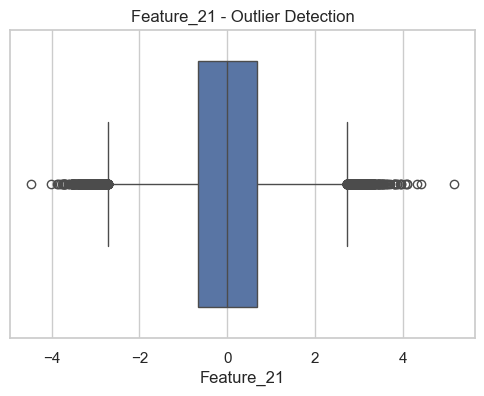

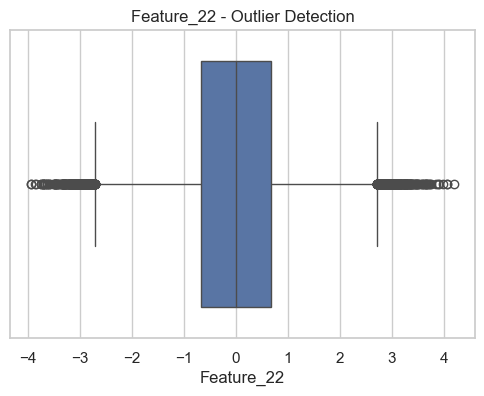

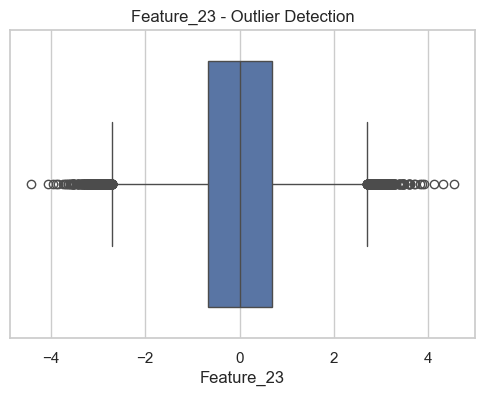

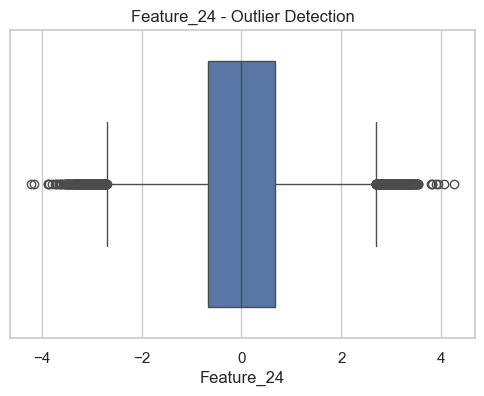

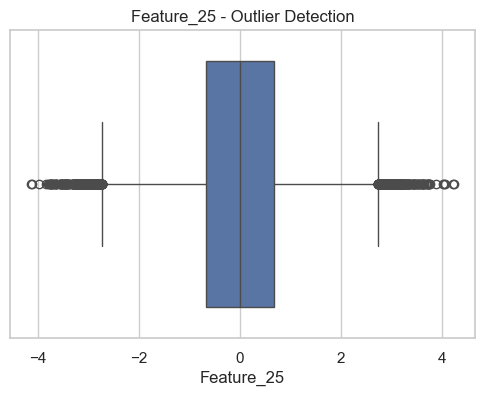

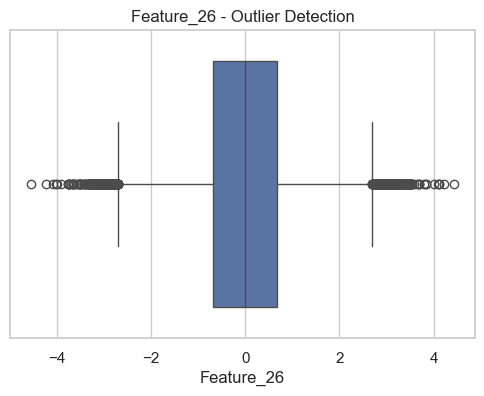

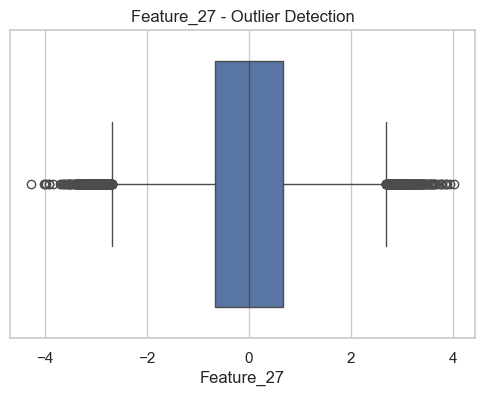

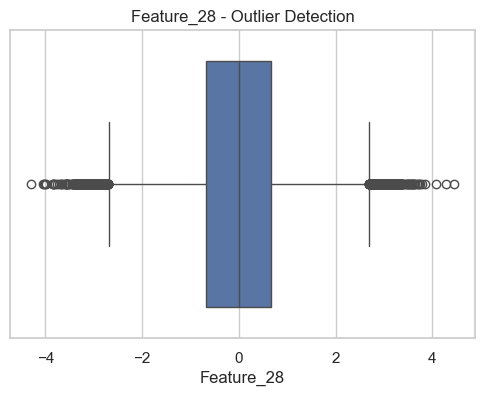

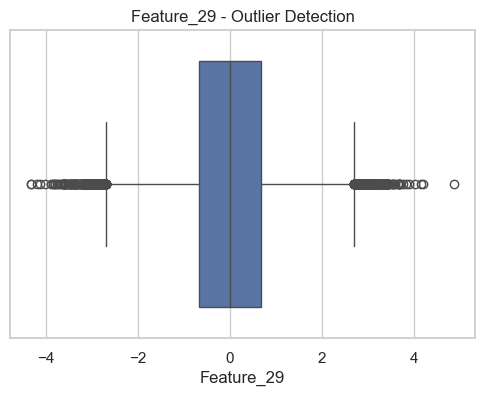

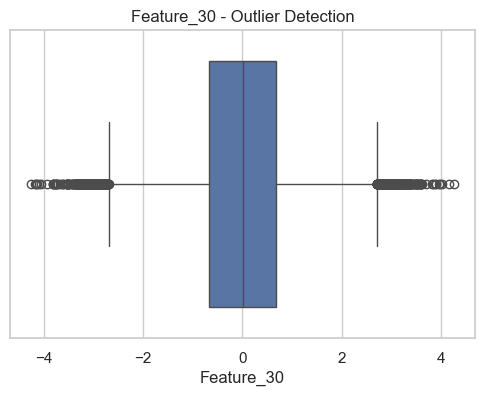

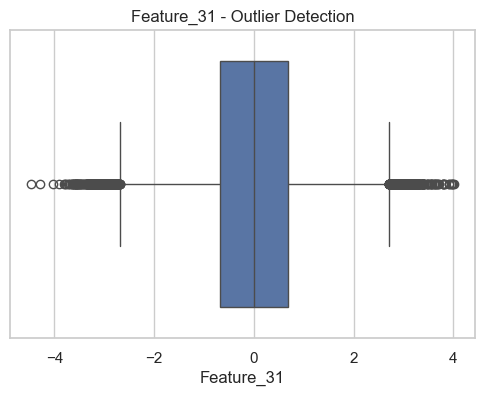

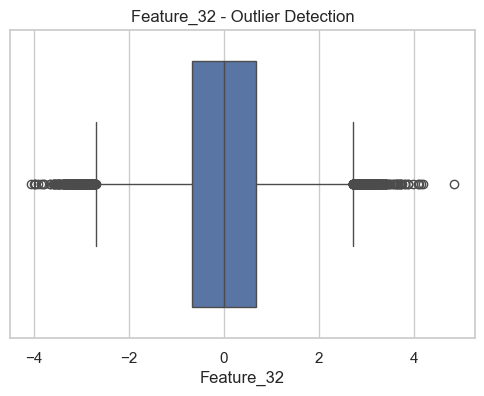

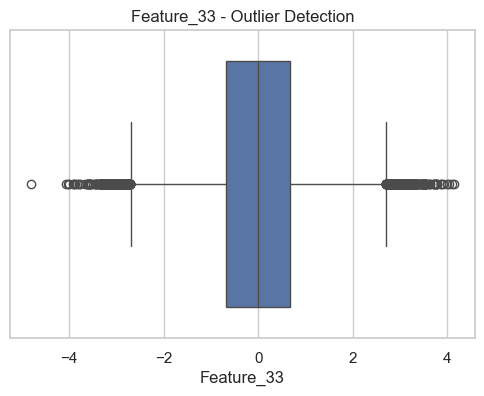

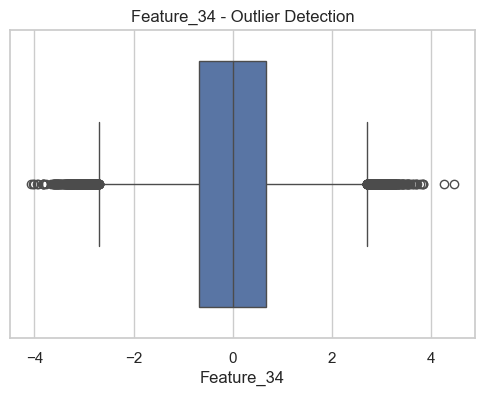

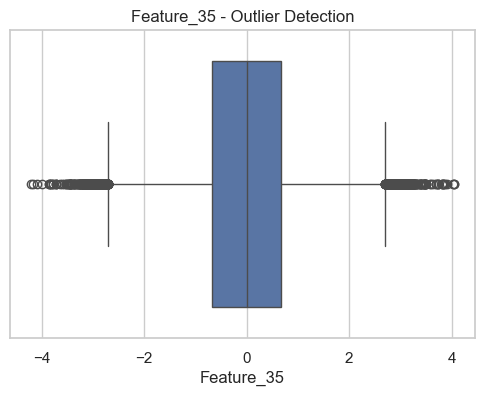

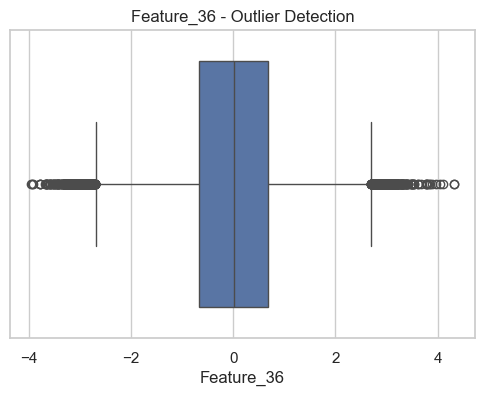

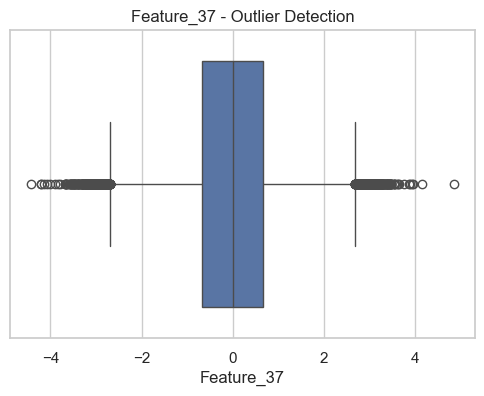

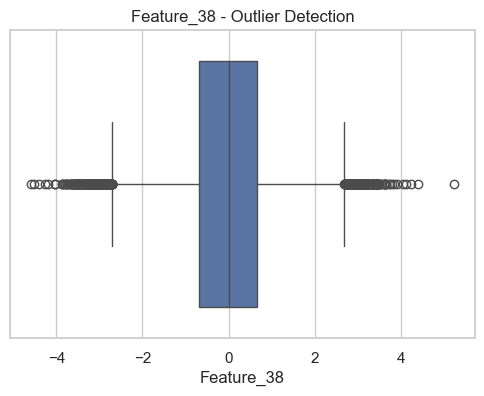

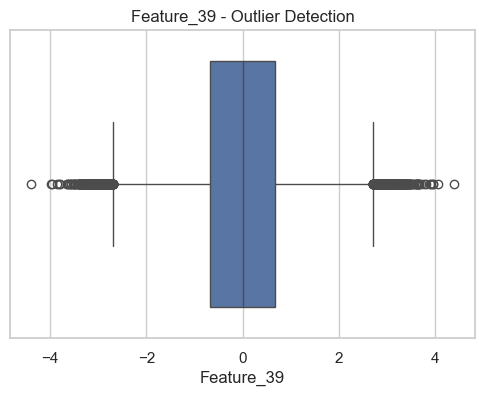

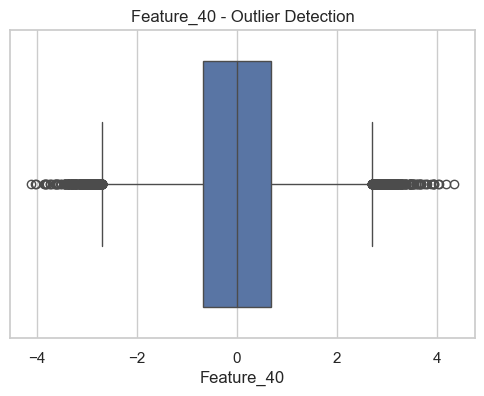

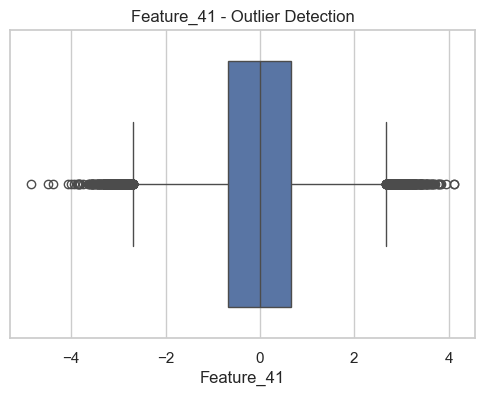

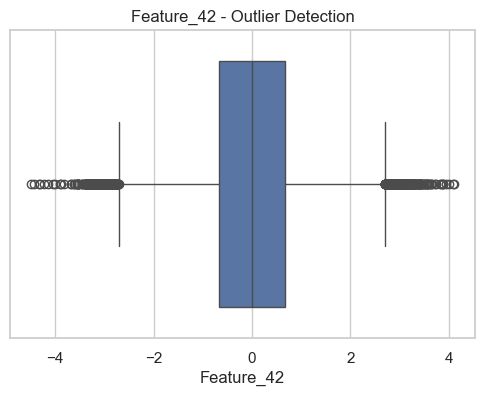

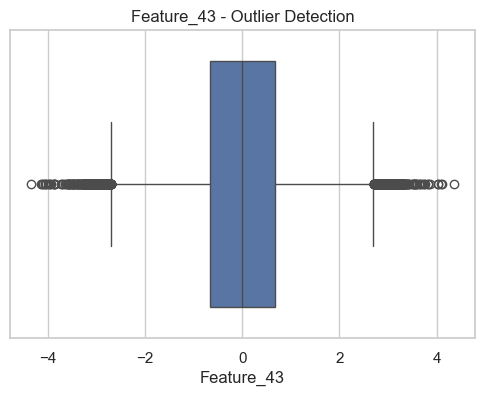

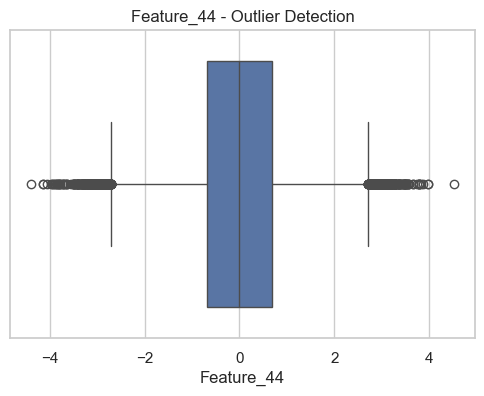

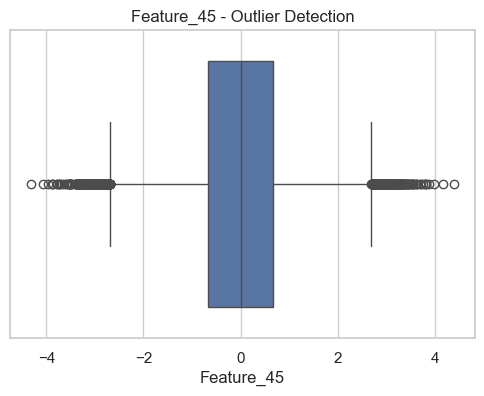

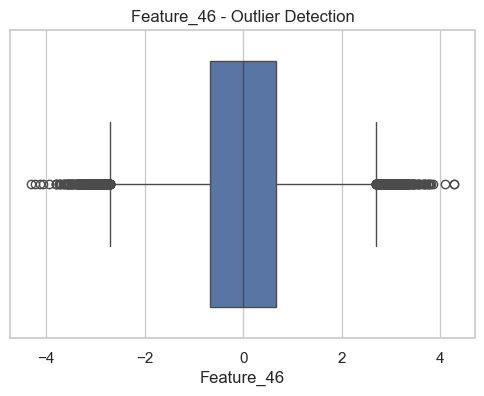

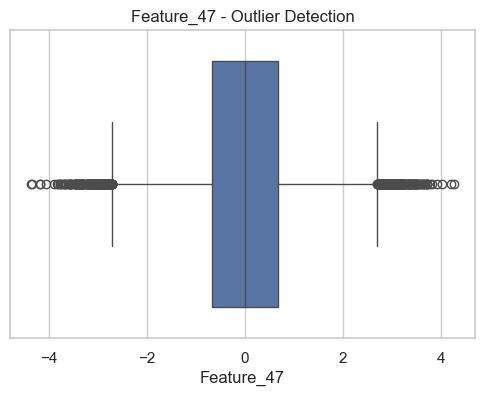

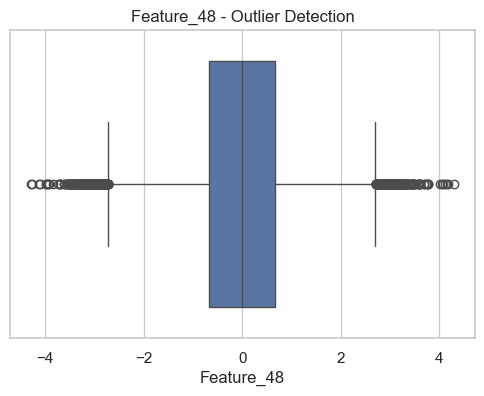

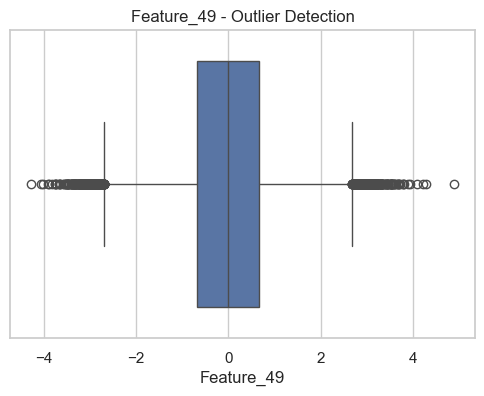

               Column  Num_Outliers   Lower_Bound    Upper_Bound
1              Income          1869  18966.333084  121616.243133
4          TotalSpend          1858   -111.530073   10168.196201
2         CreditLimit          1136   2328.700567   27626.186162
0                 Age           938     18.500000      70.500000
47         Feature_41           766     -2.685569       2.681202
15          Feature_9           760     -2.689805       2.699000
23         Feature_17           746     -2.690518       2.689991
44         Feature_38           740     -2.698201       2.690018
32         Feature_26           737     -2.706023       2.696609
26         Feature_20           735     -2.683714       2.683277
46         Feature_40           733     -2.687417       2.692434
55         Feature_49           733     -2.690301       2.687763
43         Feature_37           732     -2.691159       2.682062
42         Feature_36           726     -2.698485       2.695119
17         Feature_11    

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

figures_dir = Path("../../reports/figures/data_cleaning/outliers_before")
figures_dir.mkdir(parents=True, exist_ok=True)

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        "Column": col,
        "Num_Outliers": len(outliers),
        "Lower_Bound": lower,
        "Upper_Bound": upper
    })
    
    # Save boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Outlier Detection")
    plt.savefig(figures_dir / f"{col}_boxplot.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

# Summary DataFrame
outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Num_Outliers", ascending=False)
print(outlier_df)

In [27]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

# Apply to all numeric columns
for col in numeric_cols:
    cap_outliers_iqr(df, col)

print("Outliers capped for all numeric columns.")

Outliers capped for all numeric columns.


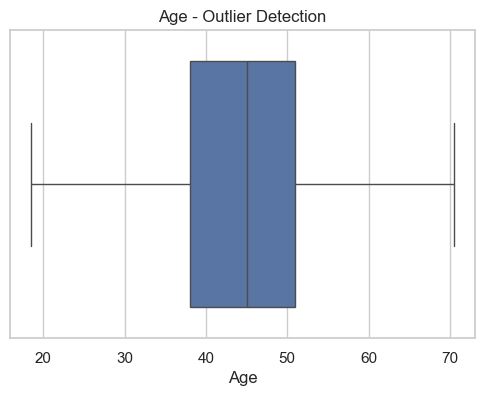

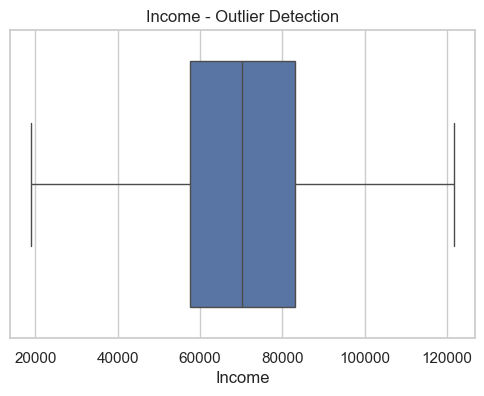

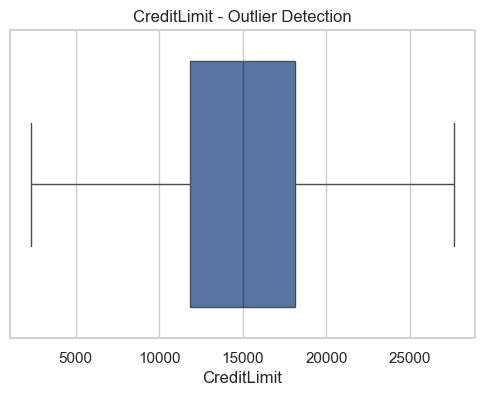

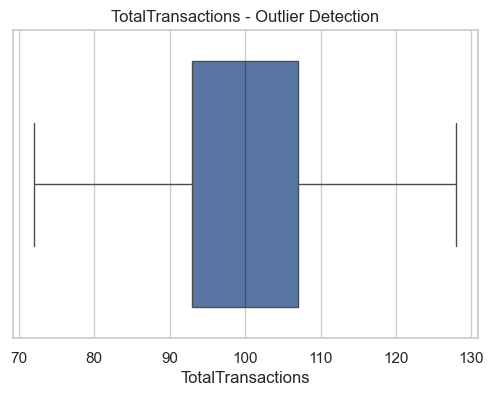

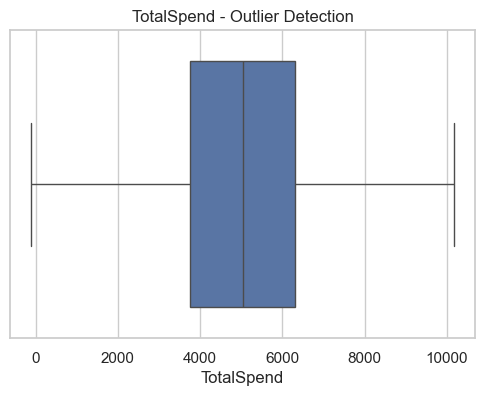

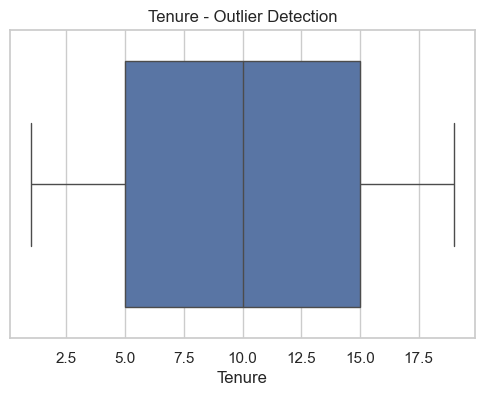

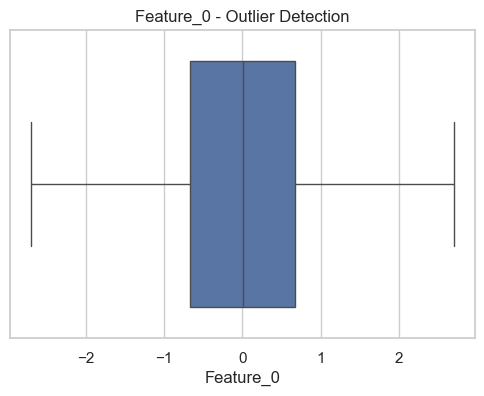

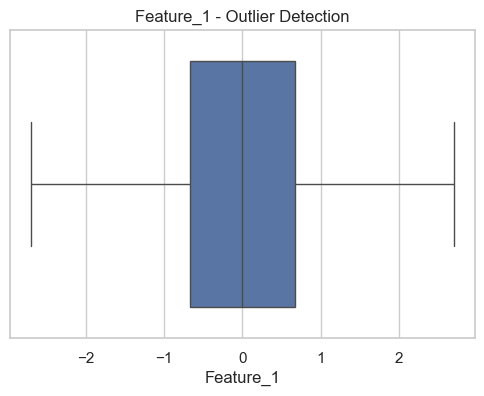

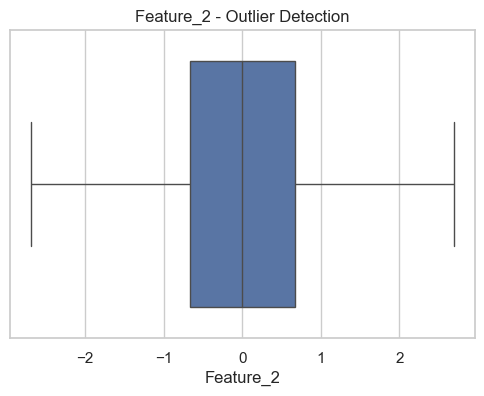

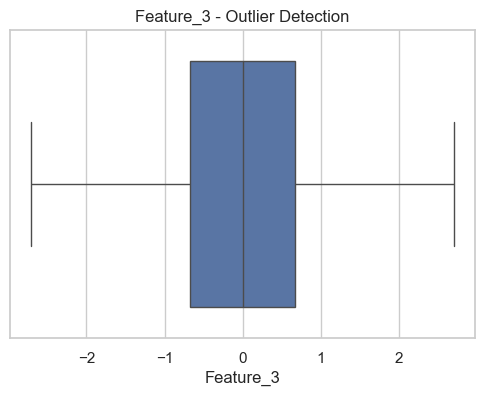

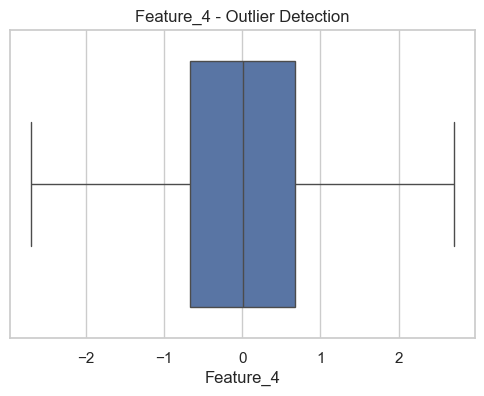

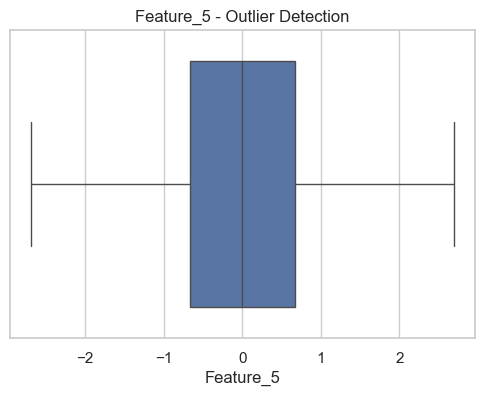

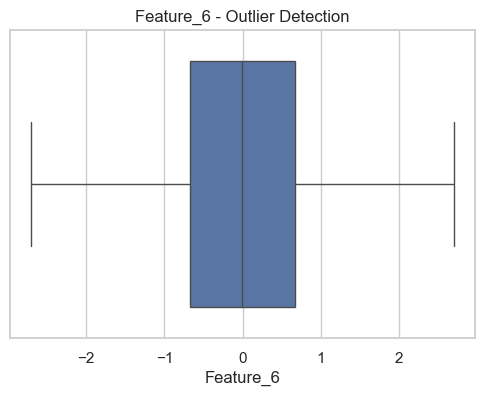

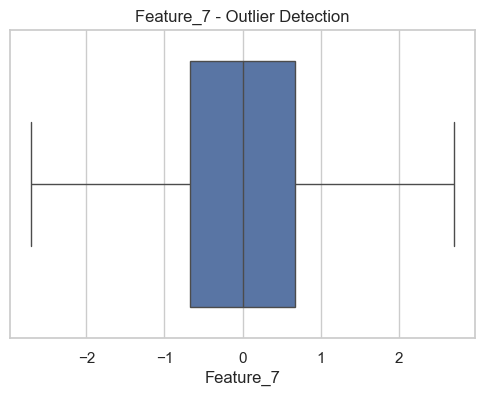

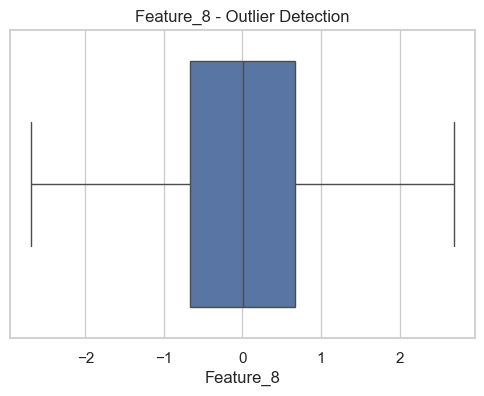

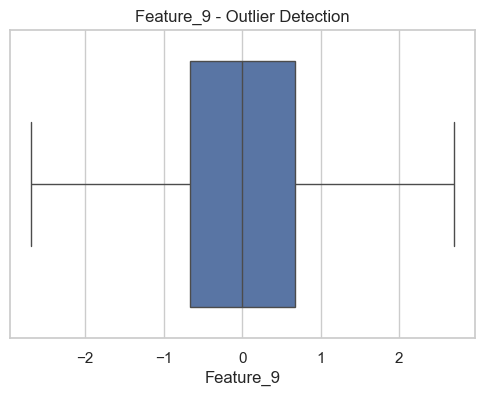

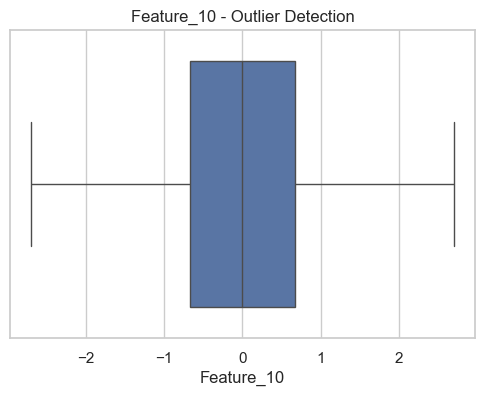

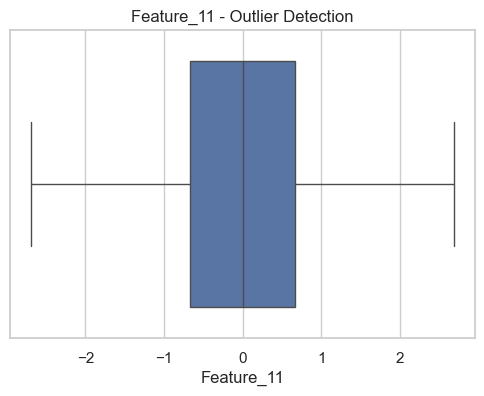

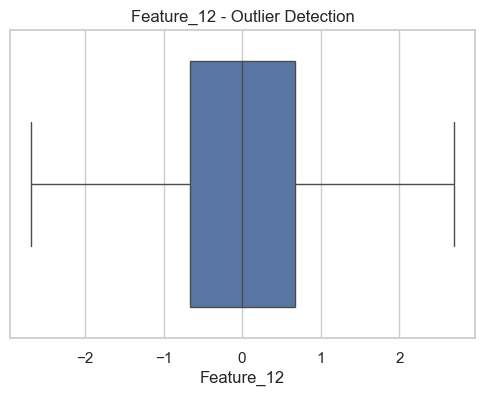

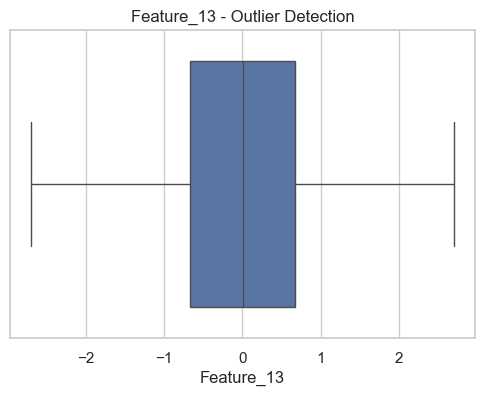

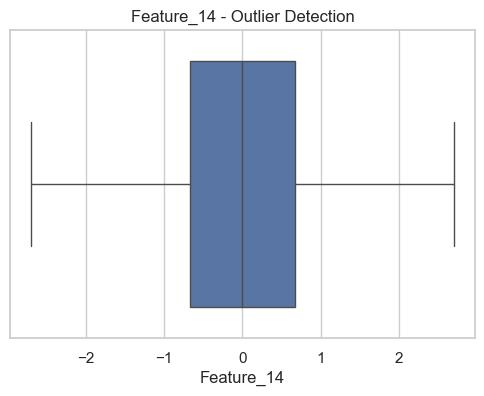

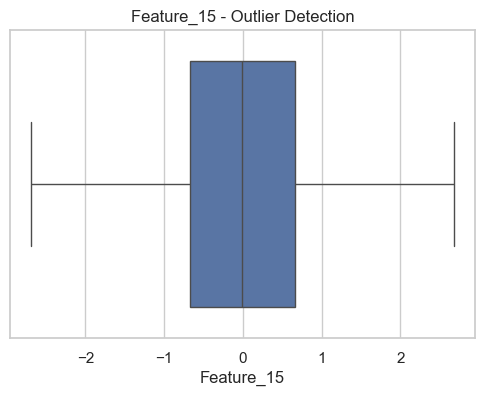

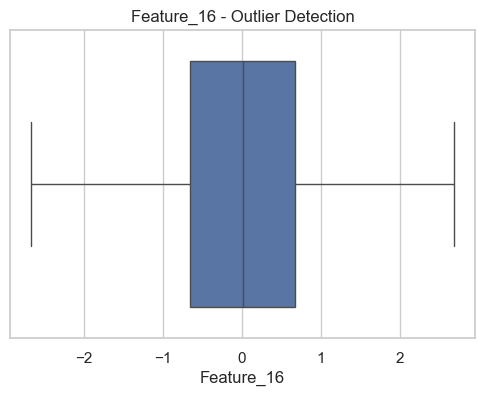

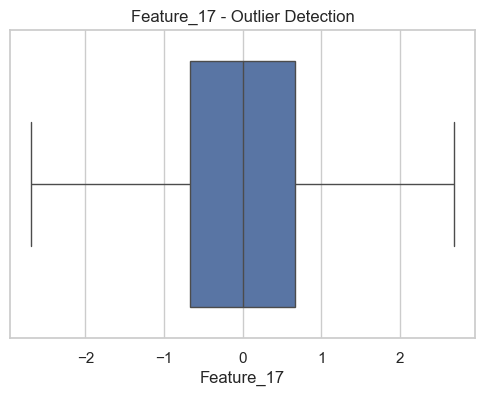

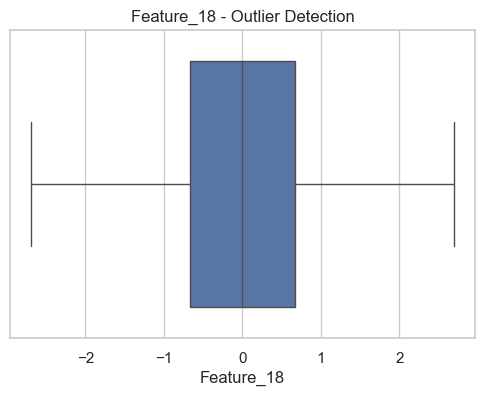

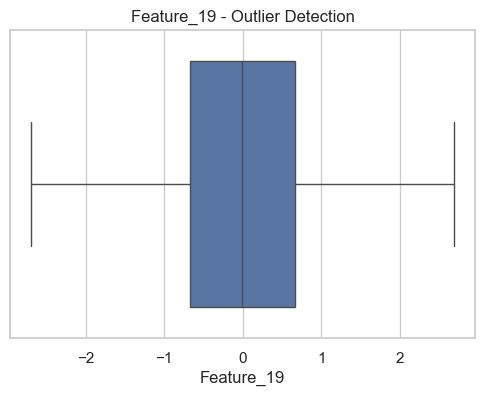

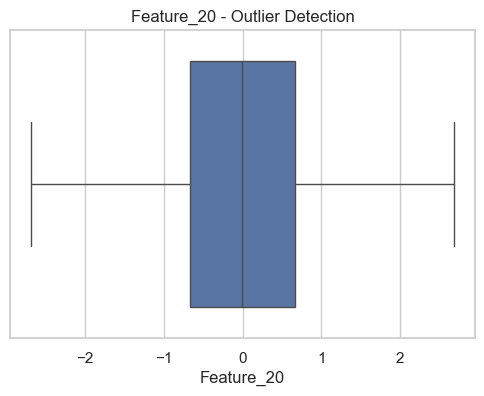

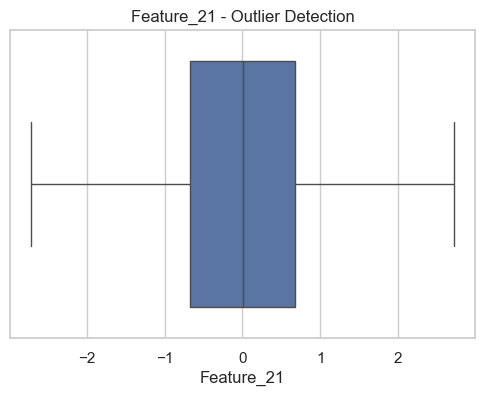

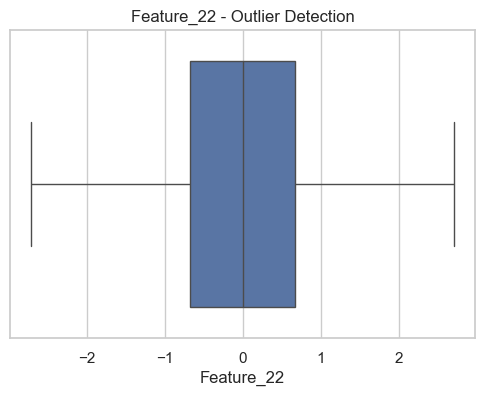

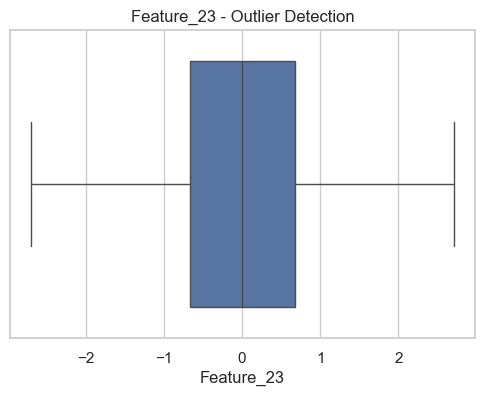

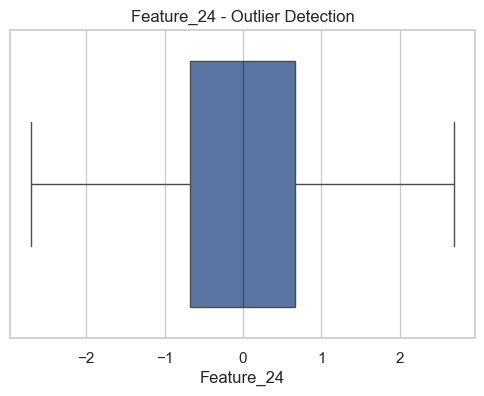

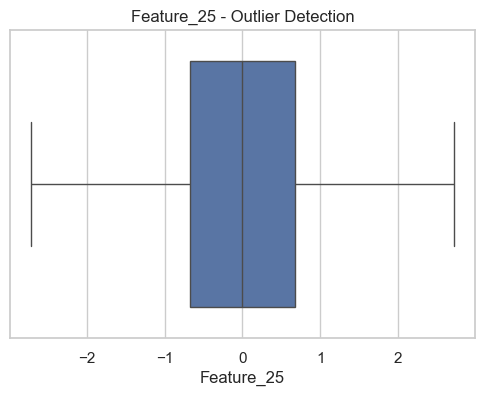

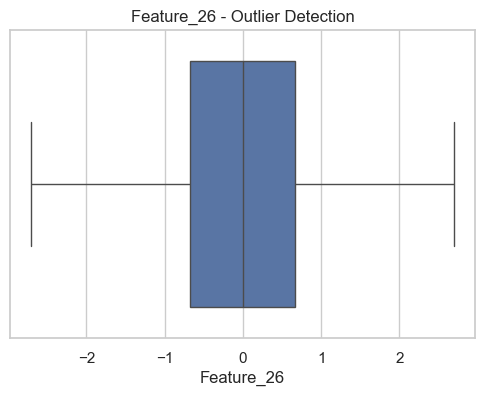

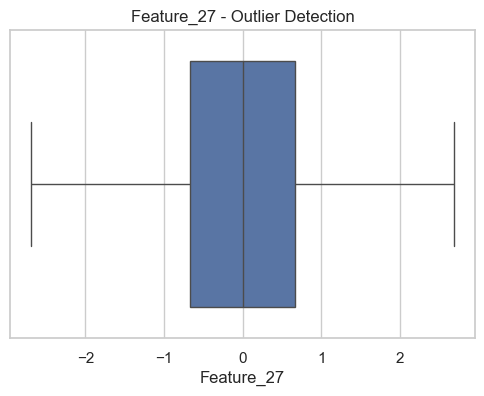

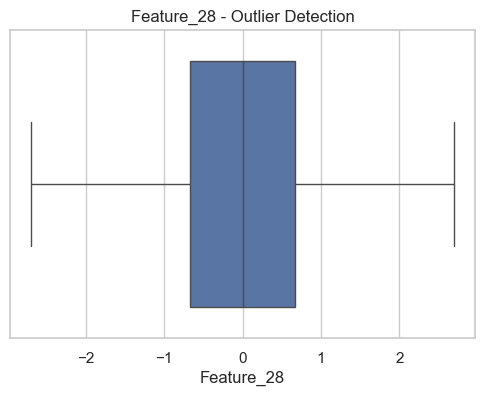

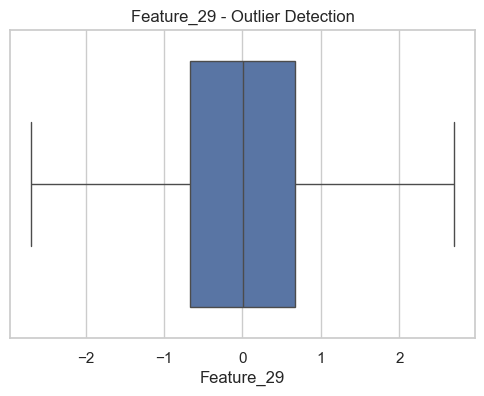

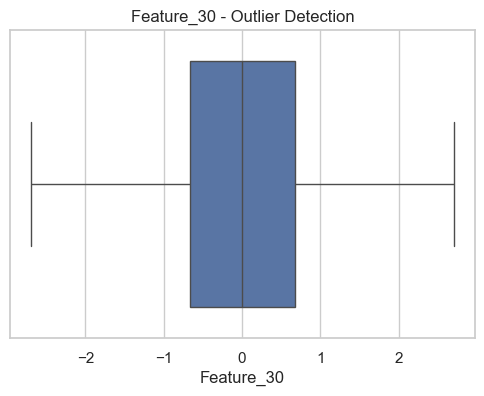

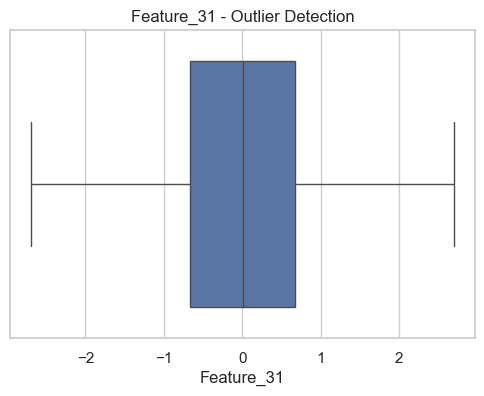

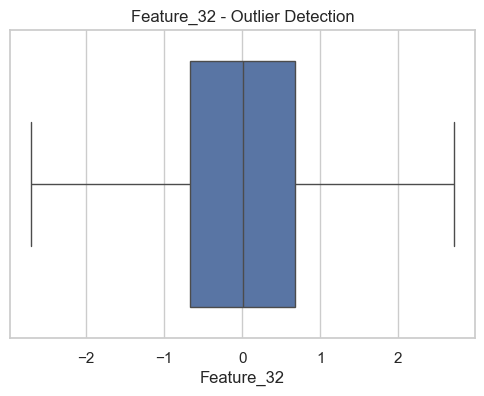

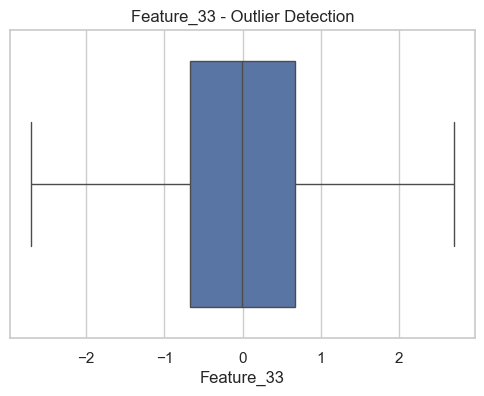

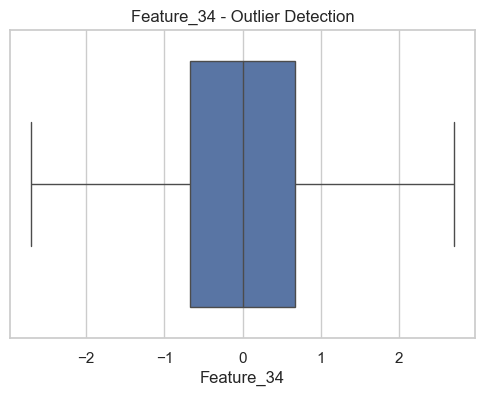

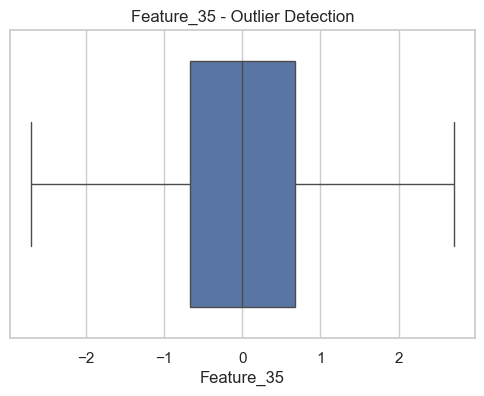

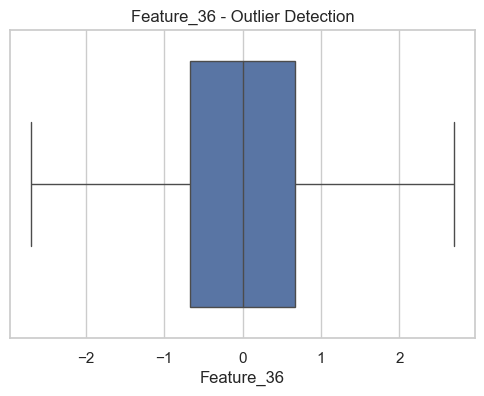

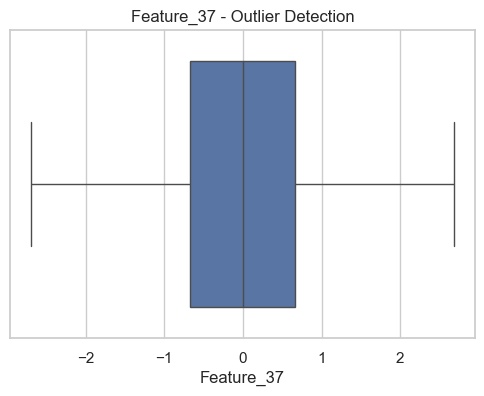

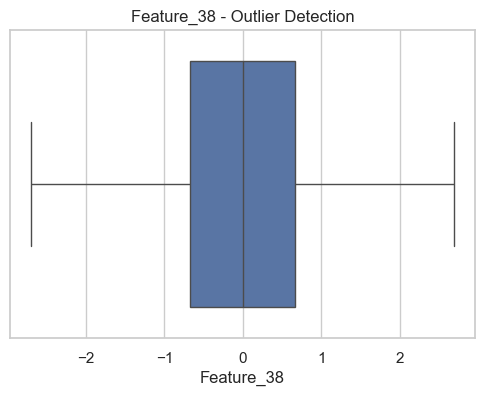

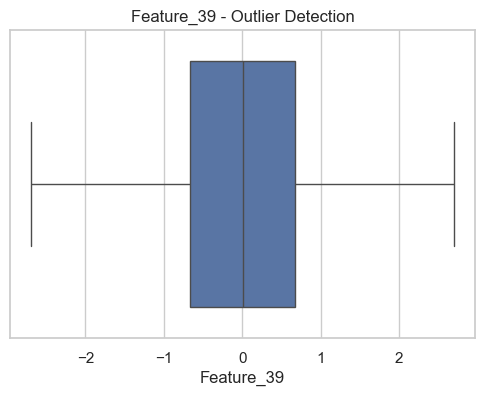

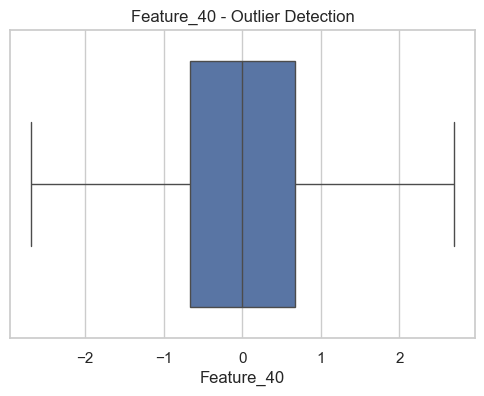

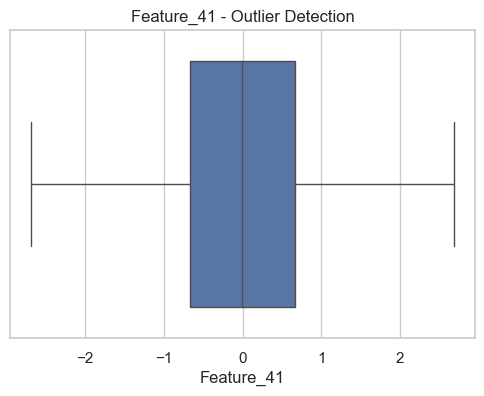

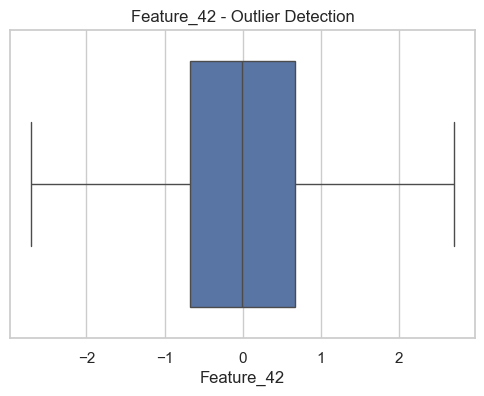

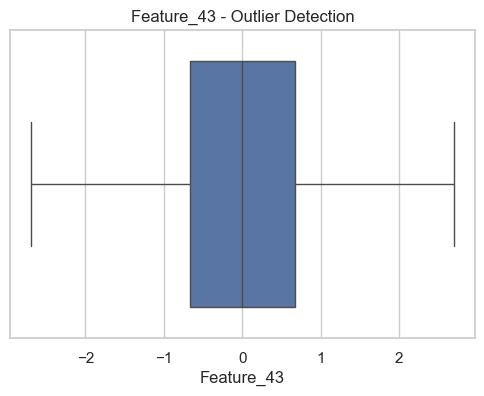

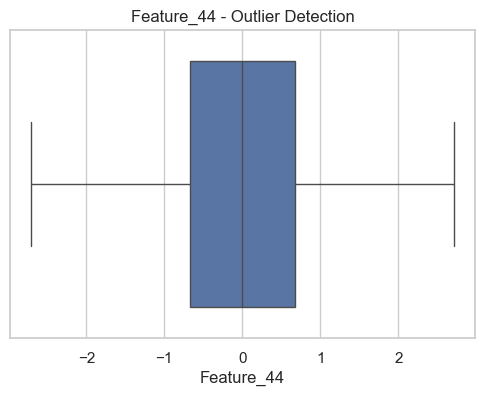

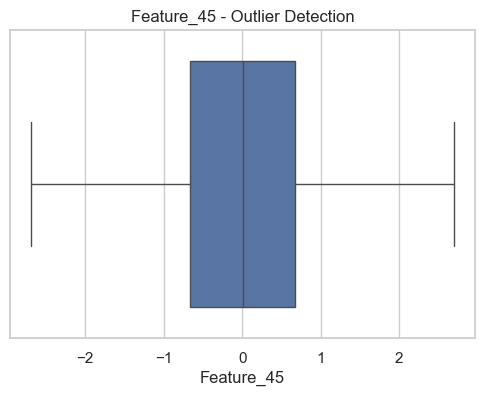

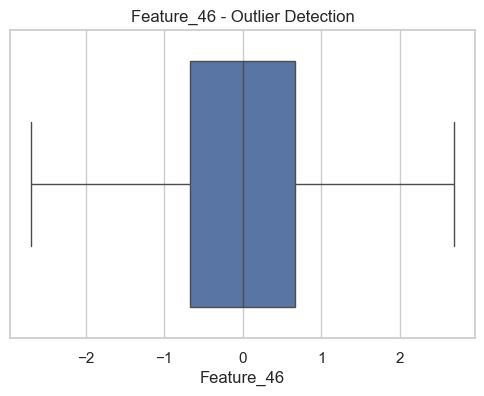

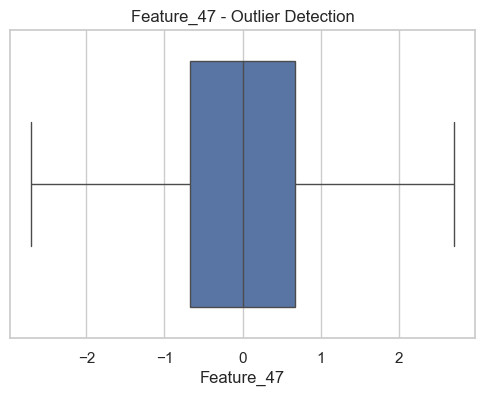

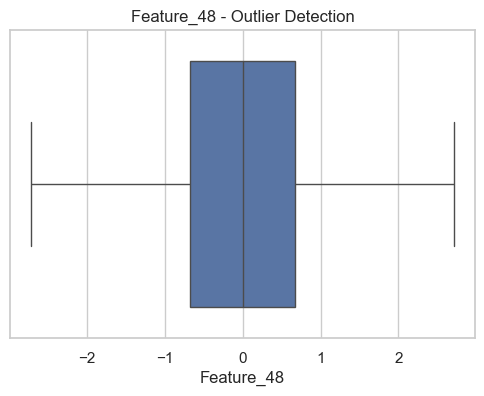

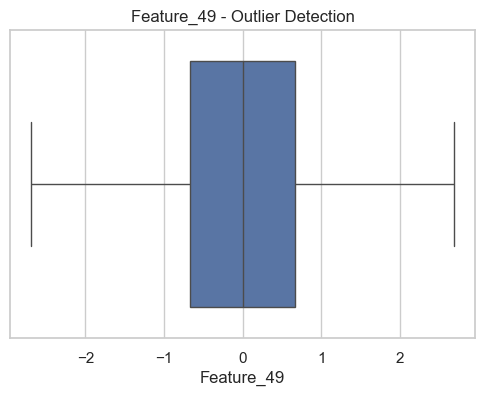

               Column  Num_Outliers   Lower_Bound    Upper_Bound
0                 Age             0     18.500000      70.500000
1              Income             0  18966.333084  121616.243133
2         CreditLimit             0   2328.700567   27626.186162
3   TotalTransactions             0     72.000000     128.000000
4          TotalSpend             0   -111.530073   10168.196201
5              Tenure             0    -10.000000      30.000000
6           Feature_0             0     -2.694614       2.696743
7           Feature_1             0     -2.701479       2.704476
8           Feature_2             0     -2.687953       2.692543
9           Feature_3             0     -2.707999       2.699376
10          Feature_4             0     -2.701428       2.706944
11          Feature_5             0     -2.685086       2.692449
12          Feature_6             0     -2.702846       2.701539
13          Feature_7             0     -2.707731       2.705994
14          Feature_8    

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

figures_dir = Path("../../reports/figures/data_cleaning/outliers_after")
figures_dir.mkdir(parents=True, exist_ok=True)

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        "Column": col,
        "Num_Outliers": len(outliers),
        "Lower_Bound": lower,
        "Upper_Bound": upper
    })
    
    # Save boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Outlier Detection")
    plt.savefig(figures_dir / f"{col}_boxplot.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

# Summary DataFrame
outlier_df = pd.DataFrame(outlier_summary).sort_values(by="Num_Outliers", ascending=False)
print(outlier_df)

*I detected outliers using the IQR method and capped them instead of removing them to preserve dataset size while reducing the influence of extreme values. This is particularly important for financial datasets where high values can be genuine but shouldn’t overly bias the model.*

## 5. Handling High Cardinality in Categorical Features

Features with too many unique categories can cause problems for modeling, such as overfitting or high dimensionality.  

In [29]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Gender', 'MaritalStatus', 'EducationLevel', 'CardType', 'Country']


In [30]:
# Count unique values in each categorical column
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Gender: 2 unique values
MaritalStatus: 4 unique values
EducationLevel: 4 unique values
CardType: 4 unique values
Country: 100 unique values


*The`Country` column is the only high cardinality, but we still need to convert categorical variables to numerical.*

In [31]:
pd.set_option('display.max_rows', None) 

for col in categorical_cols:
    print(f"Distribution of {col}:")
    print(df[col].value_counts())
    print("-" * 40)

Distribution of Gender:
Gender
Female    50191
Male      49809
Name: count, dtype: int64
----------------------------------------
Distribution of MaritalStatus:
MaritalStatus
Divorced    25196
Married     25123
Widowed     24946
Single      24735
Name: count, dtype: int64
----------------------------------------
Distribution of EducationLevel:
EducationLevel
Master         25070
High School    25040
Bachelor       24986
PhD            24904
Name: count, dtype: int64
----------------------------------------
Distribution of CardType:
CardType
Platinum    25099
Black       25076
Gold        24987
Silver      24838
Name: count, dtype: int64
----------------------------------------
Distribution of Country:
Country
Country_90     1075
Country_87     1074
Country_93     1067
Country_37     1060
Country_44     1046
Country_84     1046
Country_51     1045
Country_10     1044
Country_20     1042
Country_14     1042
Country_41     1041
Country_12     1040
Country_89     1039
Country_88     1039
C

### *One hot encoding for low cardinality variables.*

In [32]:
import pandas as pd

# Columns to one-hot encode
low_cardinality_cols = ["Gender", "MaritalStatus", "EducationLevel", "CardType"]

# One-hot encode
df_encoded = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=False)

print("Shape before encoding:", df.shape)
print("Shape after encoding:", df_encoded.shape)

print("One-hot encoding done.")

Shape before encoding: (100000, 62)
Shape after encoding: (100000, 72)
One-hot encoding done.


*Note: `df_encoded` is the new df we are working with.*

In [33]:
df_encoded.head(15)

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,Country,AttritionFlag,Feature_0,Feature_1,...,MaritalStatus_Single,MaritalStatus_Widowed,EducationLevel_Bachelor,EducationLevel_High School,EducationLevel_Master,EducationLevel_PhD,CardType_Black,CardType_Gold,CardType_Platinum,CardType_Silver
0,45.0,112955.763499,18089.293599,102.0,7057.961760,3.0,Country_36,0,-0.434767,0.119666,...,False,False,False,False,True,False,False,False,True,False
1,44.0,42980.787139,17317.747673,94.0,8101.572278,9.0,Country_97,0,0.538034,-0.258189,...,False,False,False,False,False,True,False,True,False,False
2,44.0,114584.549890,17450.444657,87.0,10168.196201,16.0,Country_34,0,-0.566592,0.014330,...,False,False,True,False,False,False,False,False,False,True
3,40.0,70262.608211,10444.914691,90.0,2534.813451,11.0,Country_54,0,1.278177,0.288838,...,False,False,False,False,True,False,False,True,False,False
4,47.0,74041.286720,8022.710937,106.0,6290.093235,4.0,Country_2,0,0.311488,0.109675,...,True,False,False,False,False,True,False,False,True,False
5,37.0,79068.227155,11885.645738,100.0,2923.047220,3.0,Country_26,0,0.370619,0.418515,...,False,False,False,False,True,False,False,True,False,False
6,37.0,41624.511240,14229.291381,102.0,6435.127114,8.0,Country_55,0,1.134457,-0.837298,...,True,False,False,False,True,False,False,False,False,True
7,50.0,68164.902669,9645.425523,80.0,5825.226982,8.0,Country_47,0,1.038635,-0.979474,...,False,False,False,False,True,False,False,False,True,False
8,43.0,73496.616054,20646.103189,90.0,3191.981484,17.0,Country_41,0,1.715595,1.679954,...,True,False,False,True,False,False,False,False,True,False
9,42.0,82054.486617,15177.882191,102.0,2893.123843,1.0,Country_2,0,-0.385059,-0.731453,...,False,False,True,False,False,False,True,False,False,False


### *Frequency Encoding for High Cardinality `Country` Column*

In [34]:
# Frequency encoding for Country column
country_freq = df_encoded['Country'].value_counts(normalize=False)  # counts (not percentage)

# Map frequencies back to the dataframe
df_encoded['Country_FE'] = df_encoded['Country'].map(country_freq)

# Drop original Country column
df_encoded.drop(columns=['Country'], inplace=True)

print("Frequency encoding applied to Country column.")
print(df_encoded[['Country_FE']].head())

Frequency encoding applied to Country column.
   Country_FE
0        1037
1         945
2        1004
3         984
4        1005


In [35]:
df_encoded.shape

(100000, 72)

In [36]:
df_encoded.head(15)

,Age,Income,CreditLimit,TotalTransactions,TotalSpend,Tenure,AttritionFlag,Feature_0,Feature_1,Feature_2,...,MaritalStatus_Widowed,EducationLevel_Bachelor,EducationLevel_High School,EducationLevel_Master,EducationLevel_PhD,CardType_Black,CardType_Gold,CardType_Platinum,CardType_Silver,Country_FE
0,45.0,112955.763499,18089.293599,102.0,7057.961760,3.0,0,-0.434767,0.119666,-0.318213,...,False,False,False,True,False,False,False,True,False,1037
1,44.0,42980.787139,17317.747673,94.0,8101.572278,9.0,0,0.538034,-0.258189,-0.903829,...,False,False,False,False,True,False,True,False,False,945
2,44.0,114584.549890,17450.444657,87.0,10168.196201,16.0,0,-0.566592,0.014330,-0.052454,...,False,True,False,False,False,False,False,False,True,1004
3,40.0,70262.608211,10444.914691,90.0,2534.813451,11.0,0,1.278177,0.288838,-0.992037,...,False,False,False,True,False,False,True,False,False,984
4,47.0,74041.286720,8022.710937,106.0,6290.093235,4.0,0,0.311488,0.109675,0.220423,...,False,False,False,False,True,False,False,True,False,1005
5,37.0,79068.227155,11885.645738,100.0,2923.047220,3.0,0,0.370619,0.418515,-0.098188,...,False,False,False,True,False,False,True,False,False,959
6,37.0,41624.511240,14229.291381,102.0,6435.127114,8.0,0,1.134457,-0.837298,1.162056,...,False,False,False,True,False,False,False,False,True,1000
7,50.0,68164.902669,9645.425523,80.0,5825.226982,8.0,0,1.038635,-0.979474,-0.804715,...,False,False,False,True,False,False,False,True,False,979
8,43.0,73496.616054,20646.103189,90.0,3191.981484,17.0,0,1.715595,1.679954,0.528363,...,False,False,True,False,False,False,False,True,False,1041
9,42.0,82054.486617,15177.882191,102.0,2893.123843,1.0,0,-0.385059,-0.731453,-0.817583,...,False,True,False,False,False,True,False,False,False,1005


In [37]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 100999
Data columns (total 72 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  float64
 1   Income                      100000 non-null  float64
 2   CreditLimit                 100000 non-null  float64
 3   TotalTransactions           100000 non-null  float64
 4   TotalSpend                  100000 non-null  float64
 5   Tenure                      100000 non-null  float64
 6   AttritionFlag               100000 non-null  int64  
 7   Feature_0                   100000 non-null  float64
 8   Feature_1                   100000 non-null  float64
 9   Feature_2                   100000 non-null  float64
 10  Feature_3                   100000 non-null  float64
 11  Feature_4                   100000 non-null  float64
 12  Feature_5                   100000 non-null  float64
 13  Feature_6          

*The `df_encoded` is now fully numeric.*

## 6. Identifying Imbalanced target variable `AttritionFlag`

Imbalanced classes can lead to biased models that favor the majority class. 

AttritionFlag
0    95040
1     4960
Name: count, dtype: int64


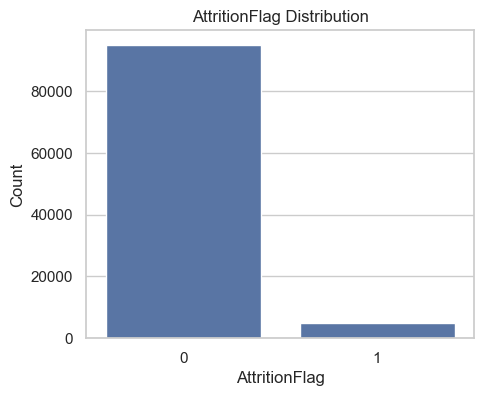

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distribution
class_counts = df_encoded['AttritionFlag'].value_counts()
print(class_counts)

# Visualize
plt.figure(figsize=(5,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("AttritionFlag Distribution")
plt.xlabel("AttritionFlag")
plt.ylabel("Count")
plt.show()

### Note on Handling Class Imbalance

The target variable `AttritionFlag` is imbalanced:

- **Class 0:** 95,040 records  
- **Class 1:** 4,960 records  

I will **not** address this imbalance during the data cleaning phase for the following reasons:

1. **Single Cleaned Dataset** – I aim to produce **one cleaned CSV file** (`credit_card_cleaned.csv`) containing all rows and columns after cleaning, without any artificial oversampling or undersampling applied at this stage.  

2. **Preventing Data Leakage** – Oversampling techniques such as **SMOTE** must be applied **only to the training set**. Applying them before splitting the dataset could introduce information from the test set into the training process, leading to overly optimistic performance estimates.  

3. **Better Workflow Separation** – Class balancing will be handled in the **model preparation stage**, after the train-test split. The steps will be:
   - Split the cleaned dataset into training and testing sets.
   - Apply **SMOTE** only on the training set to generate synthetic samples for the minority class.
   - Leave the test set untouched for an unbiased evaluation of the model.

This approach ensures a clean, reusable dataset for multiple modeling experiments while preserving the integrity of model evaluation.


## 7. Handling High dimensionality

High dimensionality can lead to increased computational cost, model overfitting, and difficulty in interpreting results.  
In this step, we aim to simplify the dataset while retaining useful information by applying two techniques:

1. **Check for Near-Zero Variance Features**  
   Features with little to no variance across samples carry minimal predictive power.  
   Such columns provide almost the same value for all observations, making them unhelpful for distinguishing between classes.  
   Removing them helps reduce noise and speeds up model training without sacrificing accuracy.

2. **Remove Highly Correlated Features**  
   Features with very high correlation (e.g., Pearson correlation coefficient > 0.95) are essentially redundant, as they carry the same information.  
   Keeping both leads to:
   - Multicollinearity issues in linear models (e.g., Logistic Regression), where coefficient estimates become unstable.
   - Increased complexity in tree-based models (e.g., Random Forest, XGBoost), with no real gain in predictive power.
   
By performing these steps **now**, we ensure that the dataset is optimized for modeling without introducing data leakage.  
No transformations here use the target variable (`AttritionFlag`), so the process is safe to apply before splitting the dataset.


## Identify & remove near-zero variance features

In [39]:
print("Initial shape:", df_encoded.shape)

Initial shape: (100000, 72)


In [40]:
# Exclude target
target = "AttritionFlag"
feature_cols = [c for c in df_encoded.columns if c != target]

# Calculate stats for each feature
nzv_stats = []
for col in feature_cols:
    top_freq = df_encoded[col].value_counts(normalize=True, dropna=False).iloc[0]
    var = df_encoded[col].var()
    nunique = df_encoded[col].nunique(dropna=False)
    nzv_stats.append((col, top_freq, var, nunique))

nzv_df = pd.DataFrame(nzv_stats, columns=["feature","top_freq","variance","nunique"])
nzv_df = nzv_df.sort_values("top_freq", ascending=False)

# Show features where >99% of values are the same (adjust threshold if you want)
top_freq_threshold = 0.99
near_constant = nzv_df[nzv_df["top_freq"] >= top_freq_threshold]["feature"].tolist()

print(f"Found {len(near_constant)} near-constant features (top_freq >= {top_freq_threshold}):")
print(near_constant)

# Optionally also show very small variance features (useful for continuous)
var_threshold = 1e-6   # you can tune this small number if needed
low_variance = nzv_df[nzv_df["variance"] <= var_threshold]["feature"].tolist()
print(f"\nFound {len(low_variance)} very low variance features (variance <= {var_threshold}):")
print(low_variance)

# Consolidate features to drop (union of both sets)
to_drop_nzv = sorted(set(near_constant + low_variance))
print(f"\nTotal features suggested to drop (near-zero var): {len(to_drop_nzv)}")

# Preview table for inspection
display(nzv_df.head(20))

Found 0 near-constant features (top_freq >= 0.99):
[]

Found 0 very low variance features (variance <= 1e-06):
[]

Total features suggested to drop (near-zero var): 0


,feature,top_freq,variance,nunique
60,MaritalStatus_Single,0.75265,1.861698e-01,2
69,CardType_Silver,0.75162,1.866892e-01,2
65,EducationLevel_PhD,0.75096,1.870209e-01,2
61,MaritalStatus_Widowed,0.75054,1.872316e-01,2
62,EducationLevel_Bachelor,0.75014,1.874319e-01,2
67,CardType_Gold,0.75013,1.874369e-01,2
63,EducationLevel_High School,0.74960,1.877017e-01,2
64,EducationLevel_Master,0.74930,1.878514e-01,2
66,CardType_Black,0.74924,1.878813e-01,2
68,CardType_Platinum,0.74901,1.879959e-01,2


*None of the features are useless constants, so we can skip removing near-zero variance columns*

### *Identify Highly Correlated Columns*

In [41]:
corr_matrix = df_encoded.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
print(f"Highly correlated columns ({len(high_corr_cols)}): {high_corr_cols}")

Highly correlated columns (1): ['Gender_Male']


### Renaming Encoded Gender Column

`Gender_Female` and `Gender_Male` are highly correlated because they are direct complements (if one is 1, the other is 0). Therefore, we will drop `Gender_Male` and rename `Gender_Female` to `Is_Female` for clarity.


In [42]:
# Drop Gender_Male
df_encoded = df_encoded.drop(columns=["Gender_Male"])

# Rename Gender_Female to Is_Female
df_encoded = df_encoded.rename(columns={"Gender_Female": "Is_Female"})

print("Dropped 'Gender_Male' and renamed 'Gender_Female' to 'Is_Female'.")

Dropped 'Gender_Male' and renamed 'Gender_Female' to 'Is_Female'.


In this step, only **1 column** (`Gender_Male`) was dropped due to perfect correlation with `Gender_Female`.  
This leaves us with **71 columns** in the dataset.

While 71 features are not considered high dimensional in a strict sense  
(high dimensionality typically refers to datasets with hundreds or thousands of features),  
this step was still important to:

- Remove redundant variables to avoid multicollinearity, which can impact model interpretability (especially in Logistic Regression).  
- Eliminate unnecessary complexity without losing useful information.

No additional dimensionality reduction was performed at this stage.  
Further dimensionality reduction techniques and feature selection will be considered later during the **feature engineering and modeling phase** using  
model-based feature importance, domain knowledge, or dimensionality reduction techniques if needed.


### Saving the Cleaned Dataset

We have now finalized the **data cleaning process** and will save the cleaned dataset into the `data/processed` folder.  
This ensures that subsequent steps such as **feature engineering** and **model training** use a consistent, pre-cleaned dataset without repeating the cleaning steps.

In [ ]:
# Save cleaned dataset to processed folder
processed_path = Path("../../data/processed/credit_card_attrition_cleaned.csv")
df_encoded.to_csv(processed_path, index=False)

print(f"Cleaned dataset saved to: {processed_path}")